In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
seed = 2407

In [3]:
# Load data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Data Preprocessing

In [4]:
# Drop the 'Over18', 'EmployeeNumber', 'StandardHours' and 'EmployeeCount' columns
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)

# Since 'MonthlyIncome' is more a accurate indicator of employee salary
df.drop('DailyRate', axis=1, inplace=True)
df.drop('HourlyRate', axis=1, inplace=True)
df.drop('MonthlyRate', axis=1, inplace=True)

In [5]:
# Label categorical data
from sklearn.preprocessing import OrdinalEncoder

# Nominal variables
df['Attrition'] = df['Attrition'].astype('category')
df['Department'] = df['Department'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

# Convert string to numeric
df[['BusinessTravel']] = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]).fit_transform(df[['BusinessTravel']])

# Ordinal variables
df['BusinessTravel'] = df['BusinessTravel'].astype(pd.CategoricalDtype(categories=[0, 1, 2], ordered=True))
df['Education'] = df['Education'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True))
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['JobInvolvement'] = df['JobInvolvement'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['JobLevel'] = df['JobLevel'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True))
df['JobSatisfaction'] = df['JobSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))

# Note: performance rating only contains 2 categorical levels
df['PerformanceRating'] = df['PerformanceRating'].astype(pd.CategoricalDtype(categories=[3, 4], ordered=True))
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['StockOptionLevel'] = df['StockOptionLevel'].astype(pd.CategoricalDtype(categories=[0, 1, 2, 3], ordered=True))
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   category
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   category
 8   Gender                    1470 non-null   category
 9   JobInvolvement            1470 non-null   category
 10  JobLevel                  1470 non-null   category
 11  JobRole                   1470 non-null   category
 12  JobSatisfaction           1470 non-null   category
 13  MaritalStatus             1470 non-null   catego

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,4707.956783,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,4919.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,8379.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,19999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
from scipy.stats import mstats

# log transformation
df["MonthlyIncome"] = np.log1p(df["MonthlyIncome"])
df["DistanceFromHome"] = np.log1p(df["DistanceFromHome"])
df["PercentSalaryHike"] = np.log1p(df["PercentSalaryHike"])

# square root (since these variables contain 0-1, making them negative when logged)
df["TotalWorkingYears"] = np.log1p(df["TotalWorkingYears"])
df["YearsAtCompany"] = np.log1p(df["YearsAtCompany"])
df["NumCompaniesWorked"] = np.log1p(df["NumCompaniesWorked"])

# winsorization
df["TrainingTimesLastYear"] = mstats.winsorize(df["TrainingTimesLastYear"], limits=[0.05, 0.1])
df["YearsInCurrentRole"] = mstats.winsorize(df["YearsInCurrentRole"], limits=[0, 0.1])
df["YearsSinceLastPromotion"] = mstats.winsorize(df["YearsSinceLastPromotion"], limits=[0, 0.1])
df["YearsWithCurrManager"] = mstats.winsorize(df["YearsWithCurrManager"], limits=[0, 0.1])

In [8]:
# One-hot-encoding
df = pd.get_dummies(df, columns=['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'], drop_first=True)
df

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,0.693147,8.698514,2.197225,2.484907,2.197225,1,1.945910,4,0,...,False,False,False,False,False,False,False,False,False,False
1,49,2.197225,8.543056,0.693147,3.178054,2.397895,3,2.397895,7,1,...,True,False,False,True,True,False,False,False,True,False
2,37,1.098612,7.645398,1.945910,2.772589,2.079442,3,0.000000,0,0,...,False,True,False,False,False,False,False,False,True,False
3,33,1.386294,7.975908,0.693147,2.484907,2.197225,3,2.197225,7,3,...,False,False,True,False,False,False,False,False,True,False
4,27,1.098612,8.151622,2.302585,2.564949,1.945910,3,1.098612,2,2,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3.178054,7.852439,1.609438,2.890372,2.890372,3,1.791759,2,0,...,False,False,True,False,True,False,False,False,True,False
1466,39,1.945910,9.209540,1.609438,2.772589,2.302585,5,2.079442,7,1,...,False,False,False,False,True,False,False,False,True,False
1467,27,1.609438,8.723069,0.693147,3.044522,1.945910,1,1.945910,2,0,...,True,True,False,False,True,False,False,False,True,False
1468,49,1.098612,8.592486,1.098612,2.708050,2.890372,3,2.302585,6,0,...,False,False,False,True,False,False,False,True,False,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import tensorflow as tf

In [10]:
# Separate features from predicted variable for each age group
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)

In [12]:
# Split the data into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, shuffle=True)

# 70% train, 15% test, 15% validation

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled_validation = scaler.transform(X_validation)

In [14]:
# Balance the data sets
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=seed)
X_smote_train, y_smote_train = oversampler.fit_resample(X_scaled_train, y_train)

In [15]:
# Balance the data sets
from imblearn.over_sampling import ADASYN
oversampler = ADASYN(random_state=seed)
X_adasyn_train, y_adasyn_train = oversampler.fit_resample(X_scaled_train, y_train)

<h1>Logistic Regression</h1>
Logistic Regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes, typically denoted as 0 and 1. It is a type of regression analysis that models the probability of a binary outcome based on one or more predictor variables.

In Logistic Regression, the relationship between the predictor variables and the binary outcome is modeled using the logistic (sigmoid) function. The logistic function maps any input value to a value between 0 and 1, representing the probability of the positive outcome. The model estimates the coefficients for each predictor variable, which indicate the strength and direction of the relationship between the predictors and the outcome.

Logistic Regression assumes that the relationship between the predictors and the log odds of the outcome is linear. The log odds are then transformed using the logistic function to obtain the probability of the positive outcome.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [17]:
# Create a base logistic regression model
logistic_model = LogisticRegression(random_state=seed)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=2407)

In [18]:
# Predictions
y_train_pred = logistic_model.predict(X_train)
y_validation_pred = logistic_model.predict(X_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.906652    0.845361  0.900875     0.876007      0.896586
recall       0.982558    0.485207  0.900875     0.733883      0.900875
f1-score     0.943080    0.616541  0.900875     0.779811      0.889451
support    860.000000  169.000000  0.900875  1029.000000   1029.000000


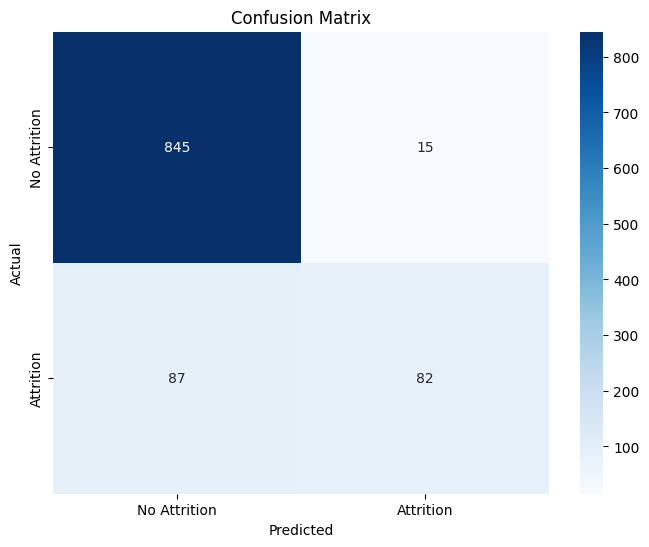

In [19]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.915423   0.736842       0.9    0.826132      0.890259
recall       0.973545   0.451613       0.9    0.712579      0.900000
f1-score     0.943590   0.560000       0.9    0.751795      0.889538
support    189.000000  31.000000       0.9  220.000000    220.000000


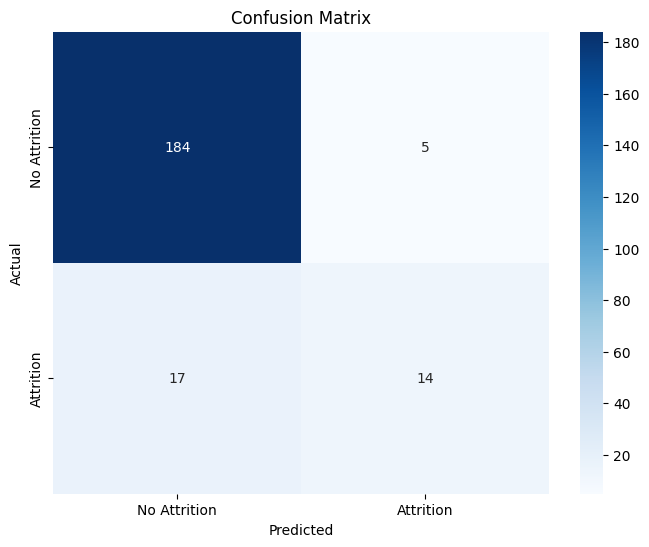

In [20]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As seen, while accuracy of the model on the test set is high (0.846939), this is due to the large number of true negatives. The model tends to predict "No Attrition" for most rows as it increases accuracy. Hence, to increase the number of "Attrition" predictions, a different metric needs to be used.

This is because logistic regression is optimised by maximising the log-likelihood objective function, which assumes equal importance for each class and aims to maximise overall accuracy. However, when dealing with imbalanced data, this approach can lead to models that are biased towards the majority class.

In the context of imbalanced data, the disproportionate representation of the majority class can overshadow the minority class, leading to suboptimal model performance. This bias towards the majority class can result in lower predictive accuracy for the minority class and misrepresentation of the true underlying patterns in the data.

Therefore, it's essential to class imbalance by using resampling methods like SMOTE or ADASYN, or adjusting the classification threshold. By doing so, we can mitigate the bias towards the majority class and improve the model's ability to accurately predict outcomes for both classes.

GridSearchCV is used to optimise the parameters of the logistic regression model. GridSearchCV performs an exhaustive search of specified parameter values to determine the most appropriate combination of values that results in the best performance for our dataset.


In [21]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [22]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [23]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
Best Recall Score: 0.836046511627907


In [24]:
# Best model
smote_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = smote_logistic_model.predict(X_smote_train)
y_validation_pred = smote_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.845036    0.818792  0.831395     0.831914      0.831914
recall       0.811628    0.851163  0.831395     0.831395      0.831395
f1-score     0.827995    0.834664  0.831395     0.831329      0.831329
support    860.000000  860.000000  0.831395  1720.000000   1720.000000


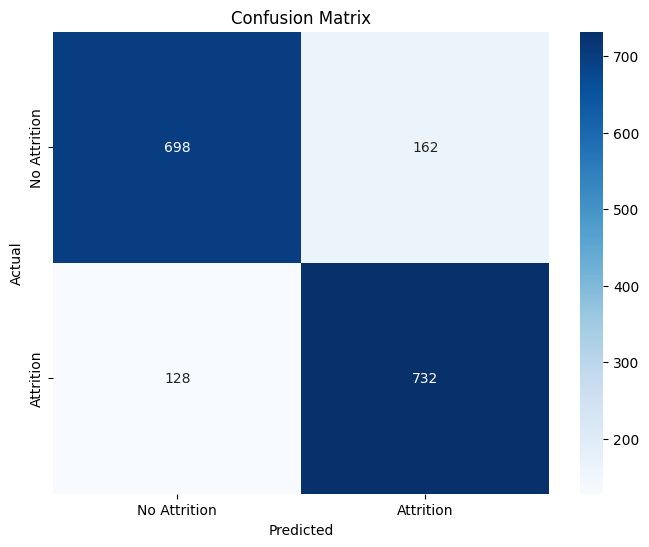

In [25]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.962264   0.409836  0.809091    0.686050      0.884422
recall       0.809524   0.806452  0.809091    0.807988      0.809091
f1-score     0.879310   0.543478  0.809091    0.711394      0.831989
support    189.000000  31.000000  0.809091  220.000000    220.000000


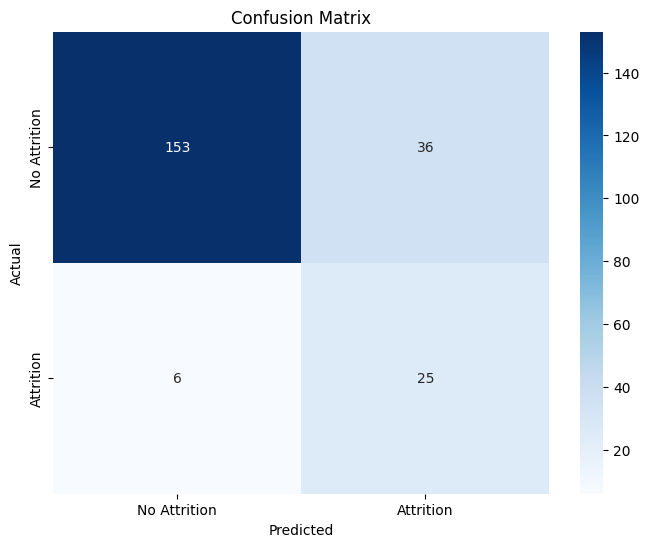

In [26]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.956250   0.491803  0.828054    0.724027      0.878492
recall       0.831522   0.810811  0.828054    0.821166      0.828054
f1-score     0.889535   0.612245  0.828054    0.750890      0.843111
support    184.000000  37.000000  0.828054  221.000000    221.000000


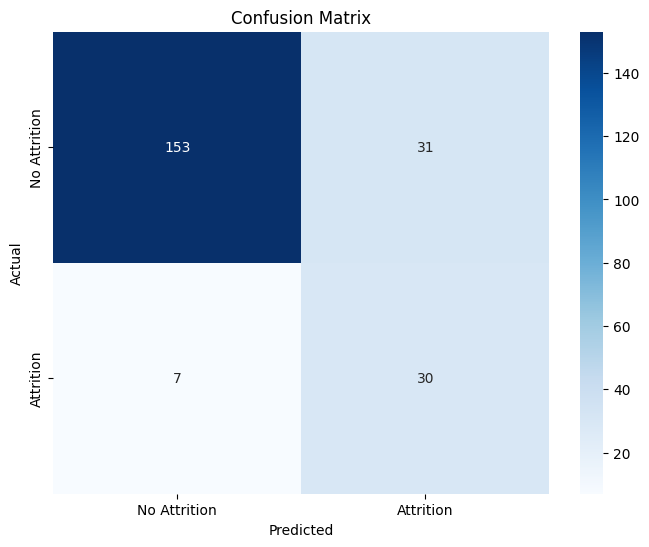

In [27]:
# Finally, predict on test set
y_test_pred = smote_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [29]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [30]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'none', 'solver': 'sag'}
Best Recall Score: 0.8135714285714286


In [31]:
# Best model
adasyn_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = adasyn_logistic_model.predict(X_adasyn_train)
y_validation_pred = adasyn_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.842683    0.808390  0.824912     0.825536      0.825718
recall       0.803488    0.846793  0.824912     0.825141      0.824912
f1-score     0.822619    0.827146  0.824912     0.824883      0.824859
support    860.000000  842.000000  0.824912  1702.000000   1702.000000


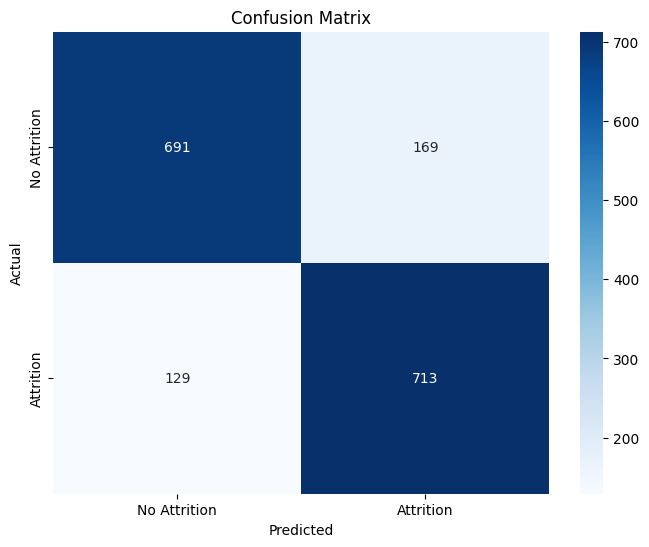

In [32]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.968354   0.419355  0.813636    0.693855      0.890995
recall       0.809524   0.838710  0.813636    0.824117      0.813636
f1-score     0.881844   0.559140  0.813636    0.720492      0.836372
support    189.000000  31.000000  0.813636  220.000000    220.000000


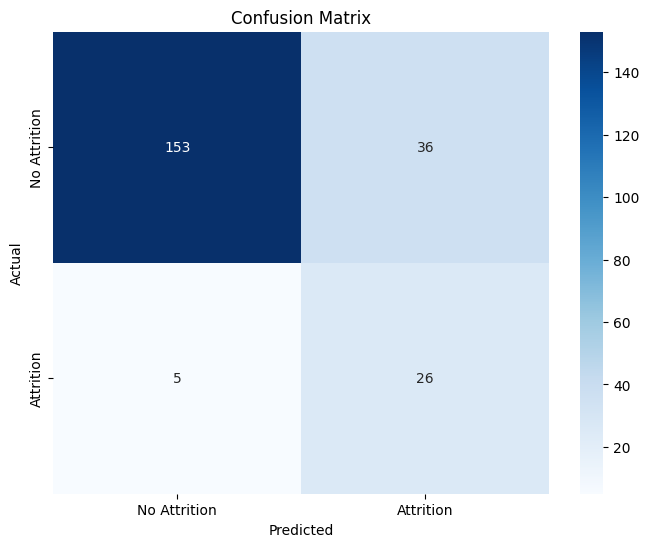

In [33]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.947020   0.414286  0.778281    0.680653      0.857829
recall       0.777174   0.783784  0.778281    0.780479      0.778281
f1-score     0.853731   0.542056  0.778281    0.697894      0.801550
support    184.000000  37.000000  0.778281  221.000000    221.000000


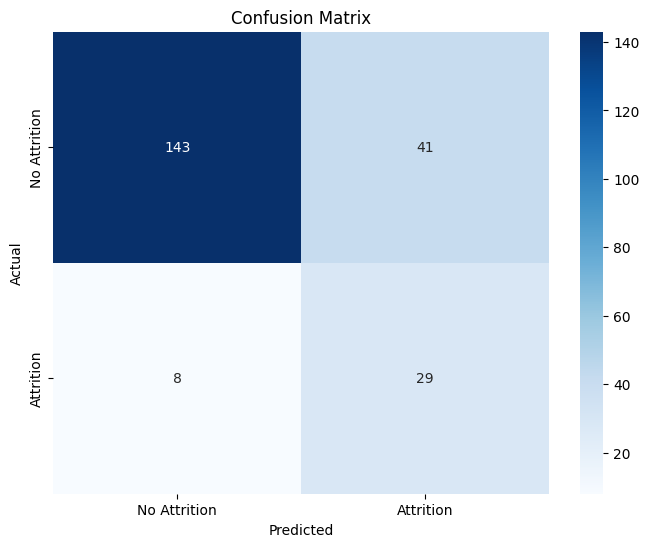

In [34]:
# Finally, predict on test set
y_test_pred = adasyn_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN achieved a higher recall on the test set, with a final recall of 0.84 and precision of 0.49.

Finally, the ROC curve and Precision-Recall curve for logistic regression trained on ADASYN is plotted. The ROC curve is a graphical representation of the TPR against the FPR for various threshold values of the classifier.

A steeper ROC curve closer to the top-left corner indicates better performance, and a higher AUC value indicates better discrimination ability of the classifier.

In [36]:
X2 = X

def backward_selection(X, logit, X_train, y_train, X_test, significance_level=0.05):
    # Step 1: Fit initial logistic regression model
    logit.fit(X_train, y_train)
    initial_score = logit.score(X_train, y_train)

    # Initialize variables for iteration
    current_score = initial_score
    current_X_train = X_train.copy()  # Create a copy to avoid modifying the original X_train
    current_X_test = X_test.copy()    # Create a copy to avoid modifying the original X_test
    
    while True:
        # Step 2: Identify the least significant variable
        coef_abs = np.abs(logit.coef_[0])
        least_significant_index = np.argmax(coef_abs)
        
        # Step 3: Remove least significant variable from both training and test sets
        current_X_train = np.delete(current_X_train, least_significant_index, axis=1)
        current_X_test = np.delete(current_X_test, least_significant_index, axis=1)
        print(X.columns[least_significant_index])
        X.drop(X.columns[least_significant_index], axis=1, inplace=True)
        
        # Step 4: Refit logistic regression model
        logit.fit(current_X_train, y_train)
        new_score = logit.score(current_X_train, y_train)
        
        # Step 5: Evaluate model fit
        # Here, we're using accuracy as the measure, but you can use other metrics
        if new_score < current_score or coef_abs.max() <= significance_level:
            break
        
        # Update current score
        current_score = new_score
    
    return X, logit, current_X_train, current_X_test

In [37]:
# Perform backward selection
X2, selected_model, X_train_selected, X_test_selected = backward_selection(X2, adasyn_logistic_model, X_scaled_train, y_train, X_scaled_test)

# Print coefficients of the selected model
print("Coefficients:", selected_model.coef_)
# Print intercept of the selected model
print("Intercept:", selected_model.intercept_)

JobRole_Manager
Department_Research & Development
Coefficients: [[-0.26357769  0.38004406 -0.43401332  0.51641835 -0.10314893 -0.61464098
  -0.25862775  0.12597401 -0.25559799  0.63111376 -0.24830471 -0.46359994
  -0.51734306 -0.08361594 -0.37762258 -0.1628677   0.0565936   0.27227388
   0.11776394  0.26150969  0.18920518 -0.21013245 -0.15728742  0.92068305
   0.42828476  0.15185364  0.29125268  0.92332021  0.58437269  0.94865453
   0.13983537  0.22960498  0.20038803  0.12681675 -0.35986654 -0.51002108
  -0.70859365 -0.5232609  -0.72397948 -0.61256319 -0.56138014  0.07916086
  -0.28286193  0.34240213 -0.31649947 -0.24620622 -0.53104526  0.08925098
  -0.29690324 -0.39502274 -0.34730935 -0.54587265 -0.30154601 -0.08286722
  -0.30220075 -0.54511108 -0.27061248]]
Intercept: [-2.81892747]


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [ ]:
y_pred_log = adasyn_logistic_model.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_log, tpr_log, thresholds_keras = roc_curve(y_test, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

# Calculate the Precision-Recall curve
precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_log)
pr_auc_log = average_precision_score(y_test, y_pred_log)

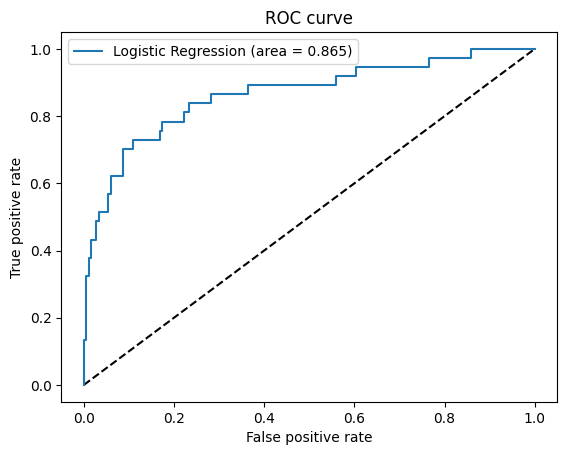

In [ ]:
# Plot the ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = {:.3f})'.format(auc_log))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

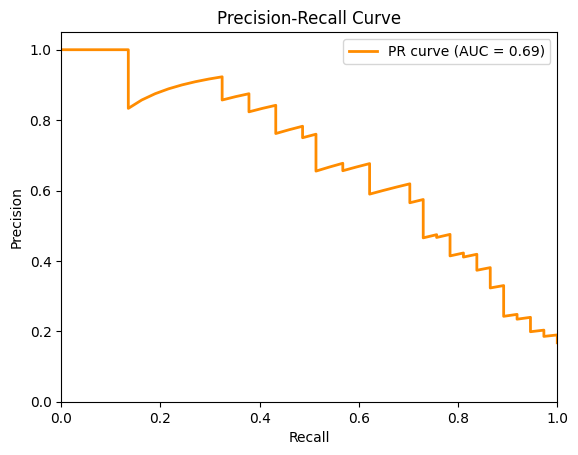

In [ ]:
# Plot the Precision-Recall curve
plt.plot(recall_log, precision_log, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_log)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

An AUC of 0.86 implies that the curve generally performs well in differentiating between the classes, as it's closer to the perfect value of 1.

In the case of our business problem, maximising true positives is more crucial than minimising false positives. As such, the optimal model is one which lies closer to the top of the curve. 

<h1>Neural Network</h1>

A neural network is a computational model consisting of interconnected neurons organised into layers. Each neuron receives input signals, performs a weighted sum of these inputs, applies an activation function to the sum, and then passes the result to the neurons in the next layer. Neural networks are capable of learning complex patterns and relationships from data through a process called training, where the network adjusts its weights and biases to minimise the difference between the predicted and actual outputs.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create a basic neural network with one hidden layer which squishes the data into range 0-1
def neural_network(X_train):
    # Defining the model
    model = Sequential([
        Dense(X_train.shape[1], activation='relu'),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'accuracy'
                    ])
    
    return model

In [ ]:
model_nn = neural_network(X_scaled_train)
 
history = model_nn.fit(X_scaled_train, y_train, batch_size=128,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    )


Epoch 1/25


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6491 - loss: 0.6182 - val_accuracy: 0.8591 - val_loss: 0.4131
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.4499 - val_accuracy: 0.8591 - val_loss: 0.3871
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.4578 - val_accuracy: 0.8591 - val_loss: 0.3704
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3998 - val_accuracy: 0.8591 - val_loss: 0.3540
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8446 - loss: 0.3669 - val_accuracy: 0.8591 - val_loss: 0.3431
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8560 - loss: 0.3647 - val_accuracy: 0.8545 - val_loss: 0.3361
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.3605 - val_accuracy: 0.8545 - val_loss: 0.3323
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.3495 - val_accuracy: 0.8636 - val_loss: 0.3265
Epoch 9/25
9/9 ━━━

 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


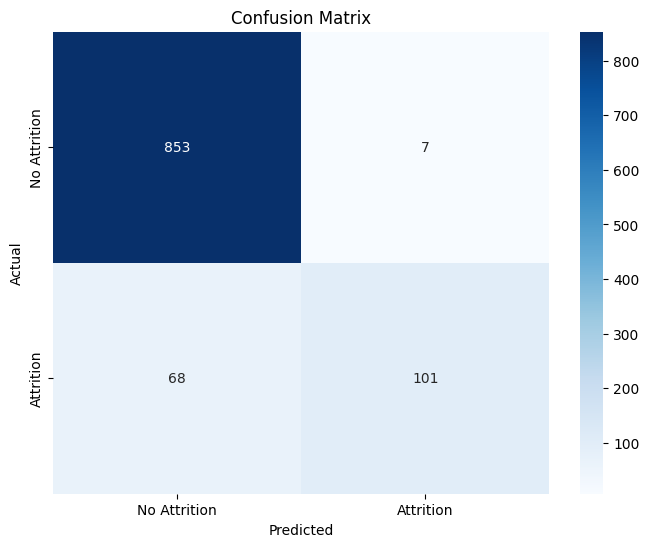

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.926167    0.935185  0.927114     0.930676      0.927648
recall       0.991860    0.597633  0.927114     0.794747      0.927114
f1-score     0.957889    0.729242  0.927114     0.843565      0.920337
support    860.000000  169.000000  0.927114  1029.000000   1029.000000


In [ ]:
# Test the model accuracy
y_pred_prob = model_nn.predict(X_scaled_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_train_np = y_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


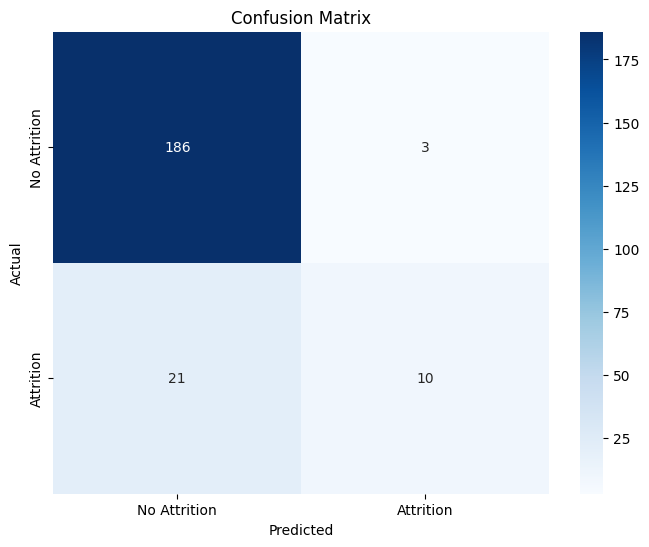

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.898551   0.769231  0.890909    0.833891      0.880328
recall       0.984127   0.322581  0.890909    0.653354      0.890909
f1-score     0.939394   0.454545  0.890909    0.696970      0.871074
support    189.000000  31.000000  0.890909  220.000000    220.000000


In [ ]:
# Test the model accuracy on the validation set
y_pred_prob = model_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

Although the model accuracy is high, this is due to the large number of rows with attrition equal to "False" compared to "True". Predicting all "False" would already result in a very high accuracy. However, since identifying attrition is the goal, it is important to identify all cases where attrition is present even if they are wrongly identified (i.e. maximising recall). As such, hyperparameter tuning is needed. Moreover, the model is overfitted as train accuracy is 100% but test accuracy is only 86%. Early stopping is needed to allow generalisation to unseen data.

Train a better model by tuning hyperparameters:

Add another layer - map out more complex features<br>
Vary number of nodes - reduce impact of irrelevant features<br>
Change activation function - allows the model to identify non-linear patterns in a different way<br>
Use 'AUC', 'precision', 'recall', 'f1_score' metrics - maximise precision and recall over accuracy<br>
Reduce batch size - allow model to fit the train data better at the expense of time<br>
Use early stopping - ensure that model does not overfit to train data

In [ ]:
def optimised_neural_network(X_train):
    # Defining the model
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation='tanh'))
    model.add(Dense(60, activation = 'tanh'))
    model.add(Dense(40, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
 
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'AUC',
                        'recall',
                    ])
    
    return model

In [ ]:
# Stop early to prevent overfitting
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

In [ ]:
model2_nn = optimised_neural_network(X_smote_train)
 
history = model2_nn.fit(X_smote_train, y_smote_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6940 - loss: 0.6198 - recall: 0.6812 - val_AUC: 0.8080 - val_loss: 0.4893 - val_recall: 0.7097
Epoch 2/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - AUC: 0.9132 - loss: 0.3848 - recall: 0.8693 - val_AUC: 0.8645 - val_loss: 0.3881 - val_recall: 0.6774
Epoch 3/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - AUC: 0.9557 - loss: 0.2853 - recall: 0.9061 - val_AUC: 0.8603 - val_loss: 0.3856 - val_recall: 0.6774
Epoch 4/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - AUC: 0.9728 - loss: 0.2221 - recall: 0.9336 - val_AUC: 0.8418 - val_loss: 0.3774 - val_recall: 0.5806
Epoch 5/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - AUC: 0.9898 - loss: 0.1505 - recall: 0.9493 - val_AUC: 0.8523 - val_loss: 0.3865 - val_recall: 0.5484
Epoch 6/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - AUC: 0.9940 - loss: 0.1137 - recall: 0.9841 - val_AUC: 0.8231 - val_loss: 0.5048 - val_recall: 0.6452
Epoch 7/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - AUC: 0.99

 1/54 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


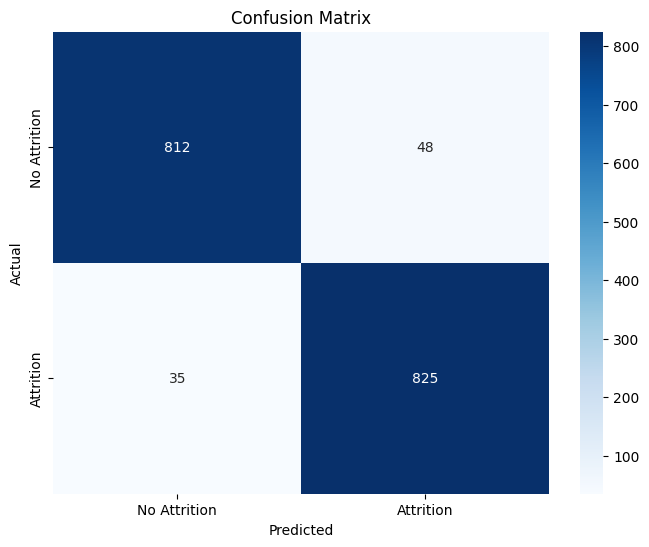

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.958678    0.945017  0.951744     0.951847      0.951847
recall       0.944186    0.959302  0.951744     0.951744      0.951744
f1-score     0.951377    0.952106  0.951744     0.951741      0.951741
support    860.000000  860.000000  0.951744  1720.000000   1720.000000


In [ ]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_smote_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_smote_train_np = y_smote_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_smote_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


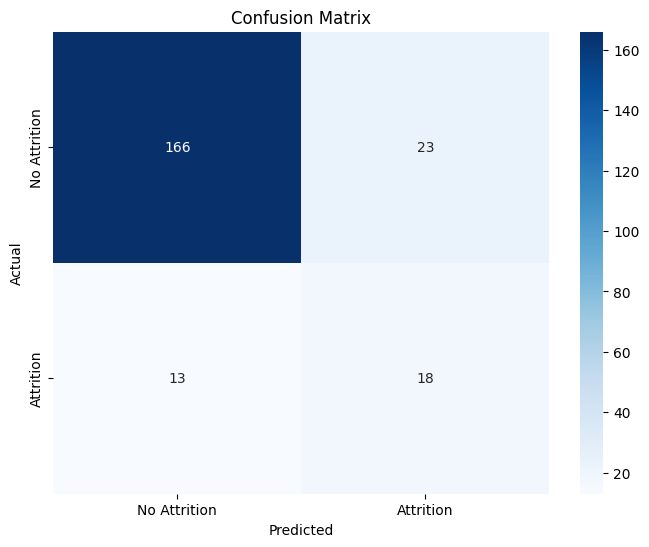

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.927374   0.439024  0.836364    0.683199      0.858561
recall       0.878307   0.580645  0.836364    0.729476      0.836364
f1-score     0.902174   0.500000  0.836364    0.701087      0.845504
support    189.000000  31.000000  0.836364  220.000000    220.000000


In [ ]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step


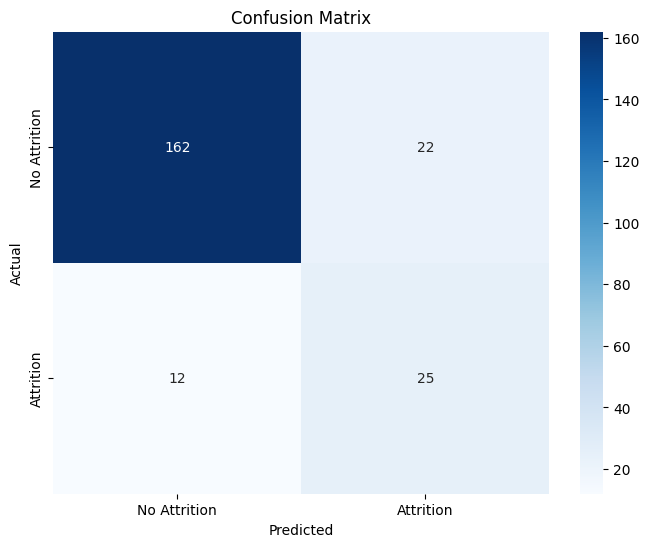

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.931034   0.531915  0.846154    0.731475      0.864214
recall       0.880435   0.675676  0.846154    0.778055      0.846154
f1-score     0.905028   0.595238  0.846154    0.750133      0.853163
support    184.000000  37.000000  0.846154  221.000000    221.000000


In [ ]:
# Finally, test the model accuracy on test set
y_pred_prob = model2_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

The recall increase significantly while precision decreases slightly. This shows that the model is able to identify more cases of attrition correctly at the expense of more incorrect predictions. However, as the cost of attrition is greater than the cost to prevent attrition, this decrease in accuracy and precision is justified.

We can find the optimal classification threshold using the ROC curve. The ROC curve compares the ratio of TPR to FPR across different classification thresholds. Finding the balance that maximises TPR (recall) can further optimise the model.

In [ ]:
model3_nn = optimised_neural_network(X_adasyn_train)
 
history = model3_nn.fit(X_adasyn_train, y_adasyn_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7332 - loss: 0.6040 - recall: 0.7257 - val_AUC: 0.9025 - val_loss: 0.4238 - val_recall: 0.8387
Epoch 2/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9066 - loss: 0.3985 - recall: 0.8497 - val_AUC: 0.8608 - val_loss: 0.4110 - val_recall: 0.7419
Epoch 3/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9371 - loss: 0.3235 - recall: 0.8918 - val_AUC: 0.8763 - val_loss: 0.3647 - val_recall: 0.7097
Epoch 4/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9639 - loss: 0.2512 - recall: 0.9193 - val_AUC: 0.9220 - val_loss: 0.3044 - val_recall: 0.8387
Epoch 5/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9823 - loss: 0.1817 - recall: 0.9483 - val_AUC: 0.8670 - val_loss: 0.3773 - val_recall: 0.6129
Epoch 6/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9936 - loss: 0.1311 - recall: 0.9714 - val_AUC: 0.8858 - val_loss: 0.3707 - val_recall: 0.7097
Epoch 7/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.998

 1/54 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


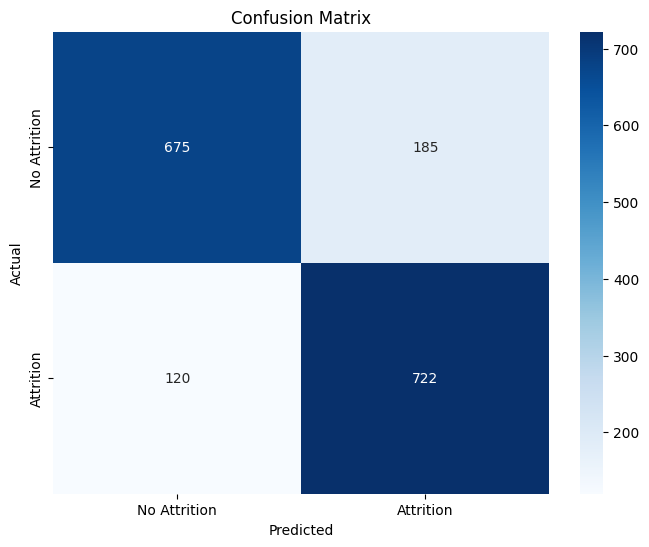

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.849057    0.796031  0.820799     0.822544      0.822824
recall       0.784884    0.857482  0.820799     0.821183      0.820799
f1-score     0.815710    0.825615  0.820799     0.820662      0.820610
support    860.000000  842.000000  0.820799  1702.000000   1702.000000


In [ ]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_adasyn_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_adasyn_train_np = y_adasyn_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_adasyn_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


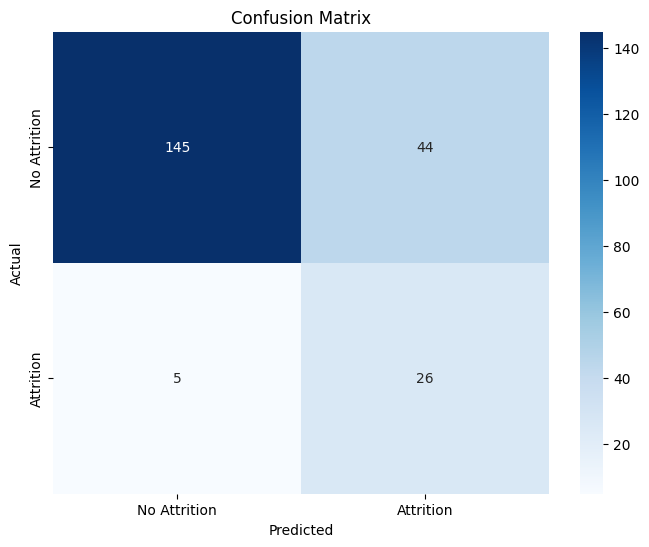

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.966667   0.371429  0.777273    0.669048      0.882792
recall       0.767196   0.838710  0.777273    0.802953      0.777273
f1-score     0.855457   0.514851  0.777273    0.685154      0.807463
support    189.000000  31.000000  0.777273  220.000000    220.000000


In [ ]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


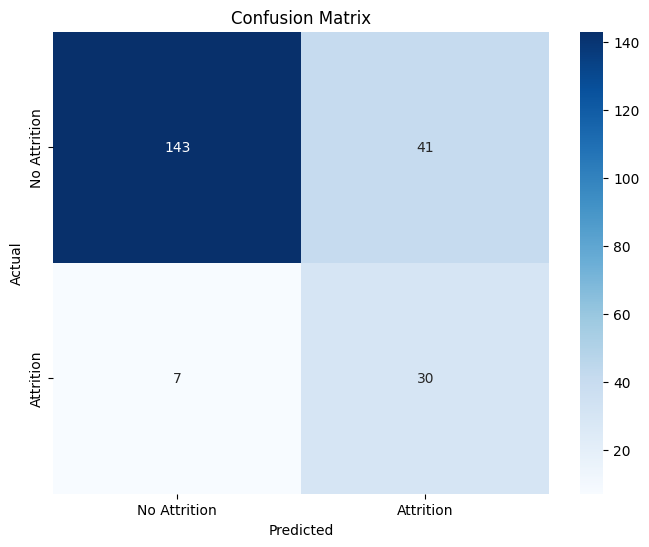

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.953333   0.422535  0.782805    0.687934      0.864467
recall       0.777174   0.810811  0.782805    0.793992      0.782805
f1-score     0.856287   0.555556  0.782805    0.705921      0.805939
support    184.000000  37.000000  0.782805  221.000000    221.000000


In [ ]:
# Test the model accuracy on test set
y_pred_prob = model3_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

ADASYN produces the better model

In [ ]:
y_pred_nn = model3_nn.predict(X_scaled_test).ravel()

# Calculate the ROC curve
fpr_nn, tpr_nn, thresholds_keras = roc_curve(y_test, y_pred_nn)
auc_nn = auc(fpr_nn, tpr_nn)

# Calculate the Precision-Recall curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_nn)
pr_auc_nn = average_precision_score(y_test, y_pred_nn)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


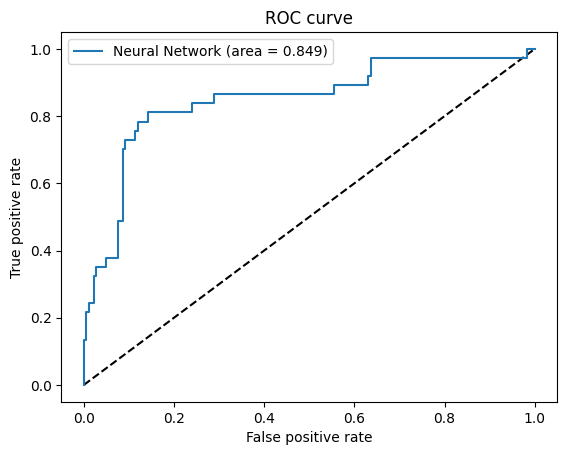

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

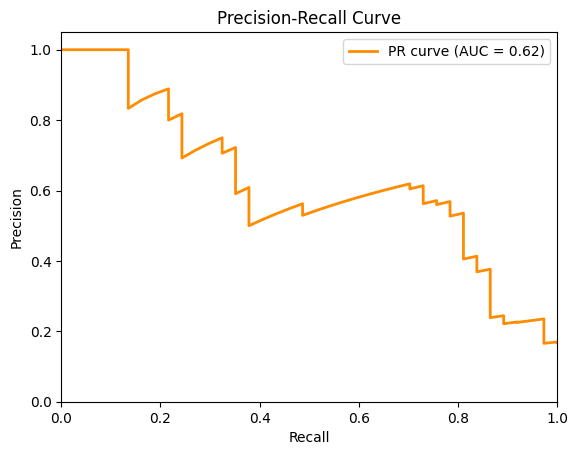

In [ ]:
# Plot the Precision-Recall curve
plt.plot(recall_nn, precision_nn, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_nn)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

<h1>CART Decision Tree</h1>

CART is a model that recursively partitions the feature space into disjoint regions, guided by the values of predictor variables, to perform classification or regression tasks. In the context of our business problem, CART builds a binary tree where each internal node represents a decision based on a specific feature, and each leaf node represents a class label. The decision at each node is made by splitting the data into subsets based on a chosen splitting criterion, typically aiming to maximise class purity or minimise impurity measures such as Gini impurity or entropy. CART iteratively selects the best split at each node until a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf. The resulting decision tree provides a transparent and interpretable model for making predictions based on input features.

In the first step, the CART model is fitted on the training dataset without any constraints on tree size. This model grows to its maximum depth, resulting in overfitting to the training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the decision tree classifier
cart = DecisionTreeClassifier(random_state = seed)
cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2407)

======== TRAIN SET RESULTS ========
Accuracy before pruning: 1.0

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


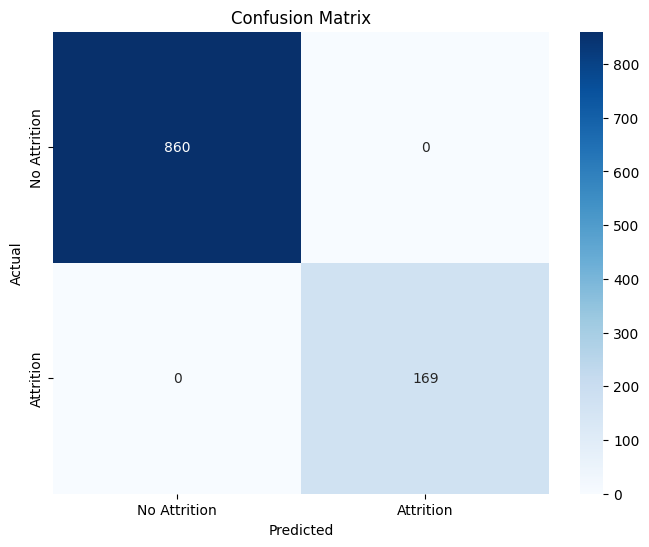

In [ ]:
print("======== TRAIN SET RESULTS ========")
# Evaluate accuracy on the train set
y_train_pred = cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========
Accuracy before pruning: 0.7545454545454545

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.868852   0.189189  0.754545    0.529021      0.773082
recall       0.841270   0.225806  0.754545    0.533538      0.754545
f1-score     0.854839   0.205882  0.754545    0.530361      0.763395
support    189.000000  31.000000  0.754545  220.000000    220.000000


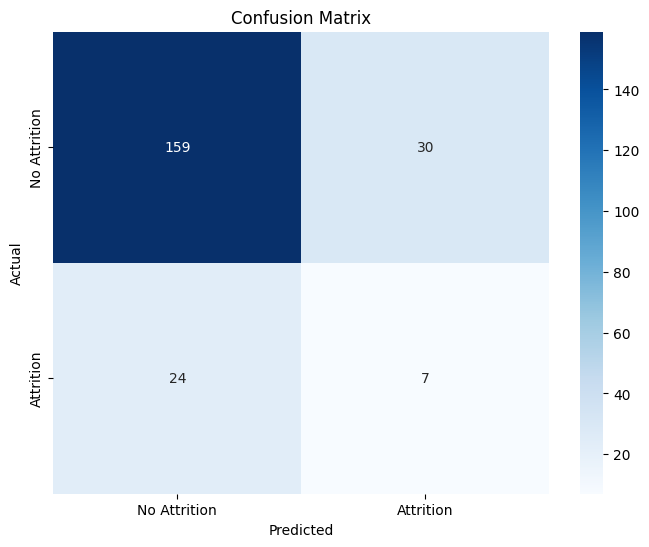

In [ ]:

print("\n======== VALIDATION SET RESULTS ========")
# Evaluate accuracy on the test set
y_validation_pred = cart.predict(X_validation)
accuracy_before_pruning = accuracy_score(y_validation, y_validation_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

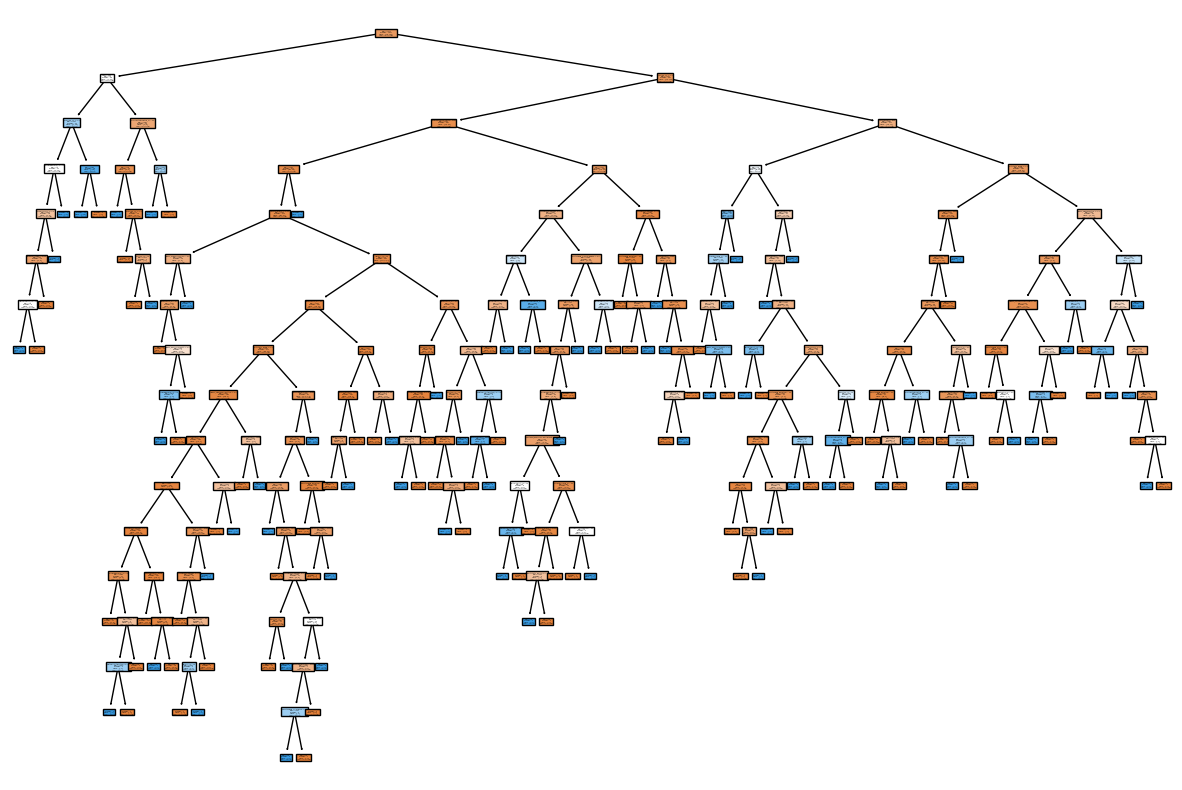

In [ ]:
# Plot the tree without pruning
plt.figure(figsize=(15, 10))
plot_tree(cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In the next step, the CART model is pruned at the optimal complexity parameter (CP). CP is a regularisation parameter that controls the trade-off between tree complexity and model performance. It penalises overly complex trees to prevent overfitting.

The CP error is minimised by selecting an optimal value for the complexity parameter through cross-validation, where different values of CP are evaluated, and the one that minimises validation error is chosen.

Pruning involves removing or collapsing certain branches of the decision tree to reduce its complexity and improve generalisation. 
Using cost-complexity pruning, nodes with the smallest increase in the complexity parameter (CP) error are removed iteratively. This is done until further pruning leads to a significant increase in validation error.

In [ ]:
from sklearn.model_selection import cross_val_score

# Train decision trees with different depths (max depth = 22)
carts = []
depths = range(1, 22)

for depth in depths:
    cart = DecisionTreeClassifier(random_state = seed, max_depth=depth)

    # Perform cross-validation
    cv_scores = cross_val_score(cart, X_train, y_train, cv=10, scoring='recall')

    # Calculate mean cross-validation error
    cv_error = 1 - cv_scores.mean()
    carts.append(cv_error)

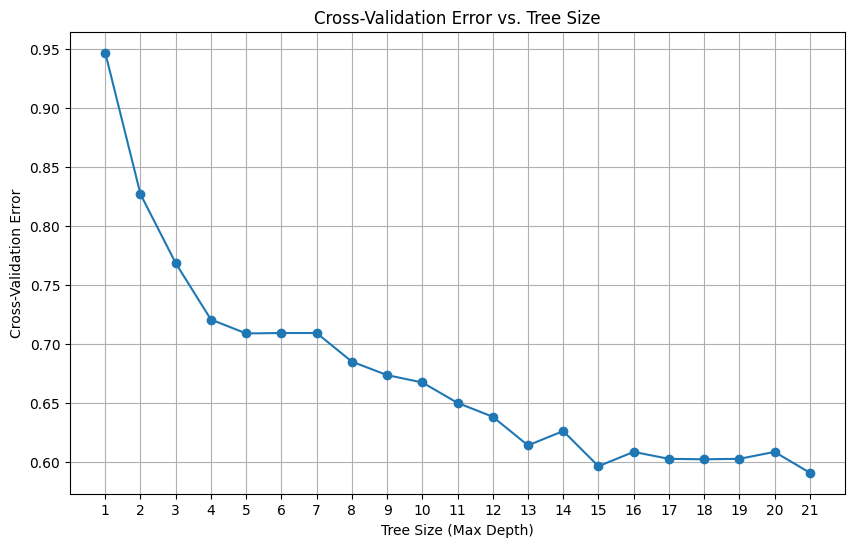

In [ ]:
# Plot cross-validation error against tree size
plt.figure(figsize=(10, 6))
plt.plot(depths, carts, marker='o', linestyle='-')
plt.title('Cross-Validation Error vs. Tree Size')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Cross-Validation Error')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [ ]:
# Find the index of the lowest cross-validation error
carts = np.array(carts)
min_error_index = np.argmin(carts)

# Calculate standard deviation of cross-validation errors
std_error = np.std(carts)

# Find one standard error above the lowest cross-validation error
one_std_error_above_min = carts[min_error_index] + std_error
print(one_std_error_above_min)

0.6777267155756108


In [ ]:
carts
# Therefore, tree should be pruned at depth 8

array([0.94705882, 0.82720588, 0.76875   , 0.72095588, 0.70919118,
       0.70955882, 0.70955882, 0.68529412, 0.67389706, 0.66764706,
       0.65036765, 0.63860294, 0.61433824, 0.62647059, 0.59669118,
       0.60882353, 0.60294118, 0.60257353, 0.60294118, 0.60882353,
       0.59117647])

In [ ]:
# Prune the decision tree with the optimal ccp_alpha
pruned_cart = DecisionTreeClassifier(random_state = seed, max_depth = 8)
pruned_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2407)

In [ ]:
# Evaluate accuracy on the test set after pruning
y_pruned_pred = pruned_cart.predict(X_train)
accuracy_after_pruning = accuracy_score(y_train, y_pruned_pred)
print(f'Accuracy after pruning: {accuracy_after_pruning}')

Accuracy after pruning: 0.9465500485908649


======== TRAIN SET RESULTS ========
Accuracy before pruning: 0.9465500485908649

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.949721    0.925373   0.94655     0.937547      0.945722
recall       0.988372    0.733728   0.94655     0.861050      0.946550
f1-score     0.968661    0.818482   0.94655     0.893571      0.943996
support    860.000000  169.000000   0.94655  1029.000000   1029.000000


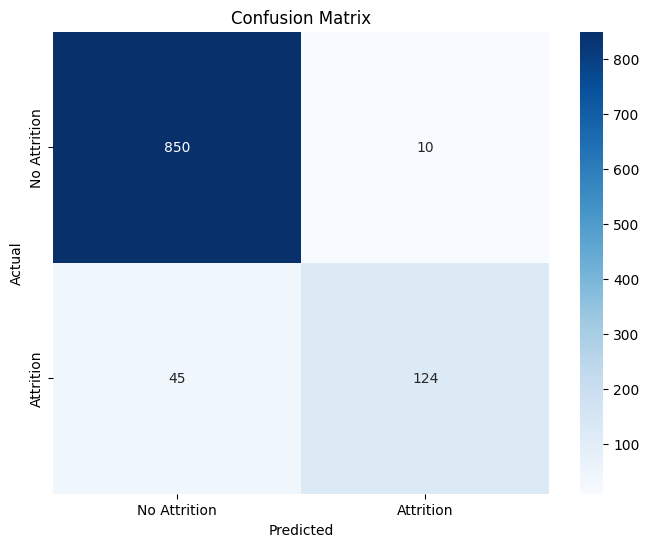

In [ ]:
print("======== TRAIN SET RESULTS ========")
y_train_pred = pruned_cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.871795   0.240000       0.8    0.555897      0.782769
recall       0.899471   0.193548       0.8    0.546510      0.800000
f1-score     0.885417   0.214286       0.8    0.549851      0.790848
support    189.000000  31.000000       0.8  220.000000    220.000000


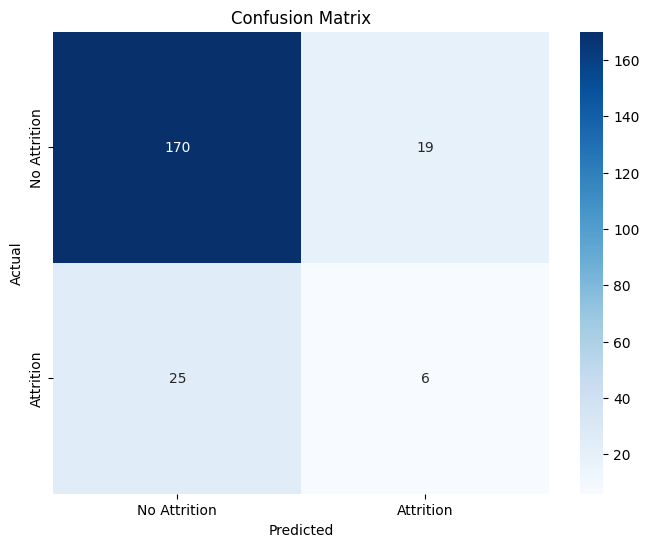

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
y_validation_pred = pruned_cart.predict(X_validation)
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
             False       True  accuracy   macro avg  weighted avg
precision    0.875   0.378378  0.791855    0.626689      0.791855
recall       0.875   0.378378  0.791855    0.626689      0.791855
f1-score     0.875   0.378378  0.791855    0.626689      0.791855
support    184.000  37.000000  0.791855  221.000000    221.000000


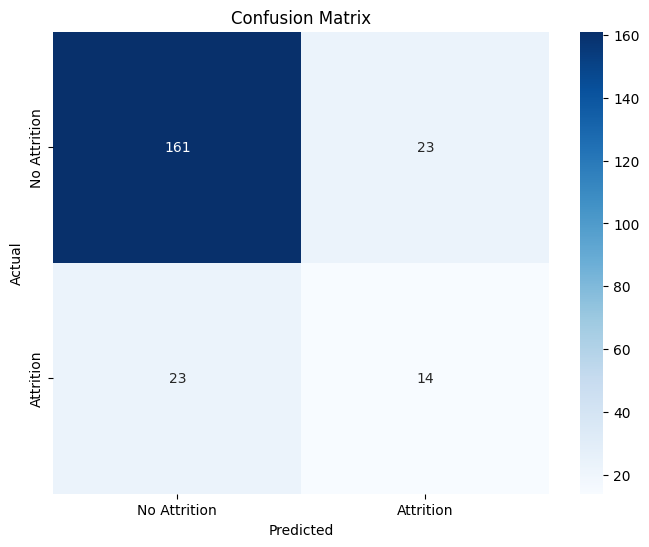

In [ ]:
print("\n======== TEST SET RESULTS ========")
y_test_pred = pruned_cart.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

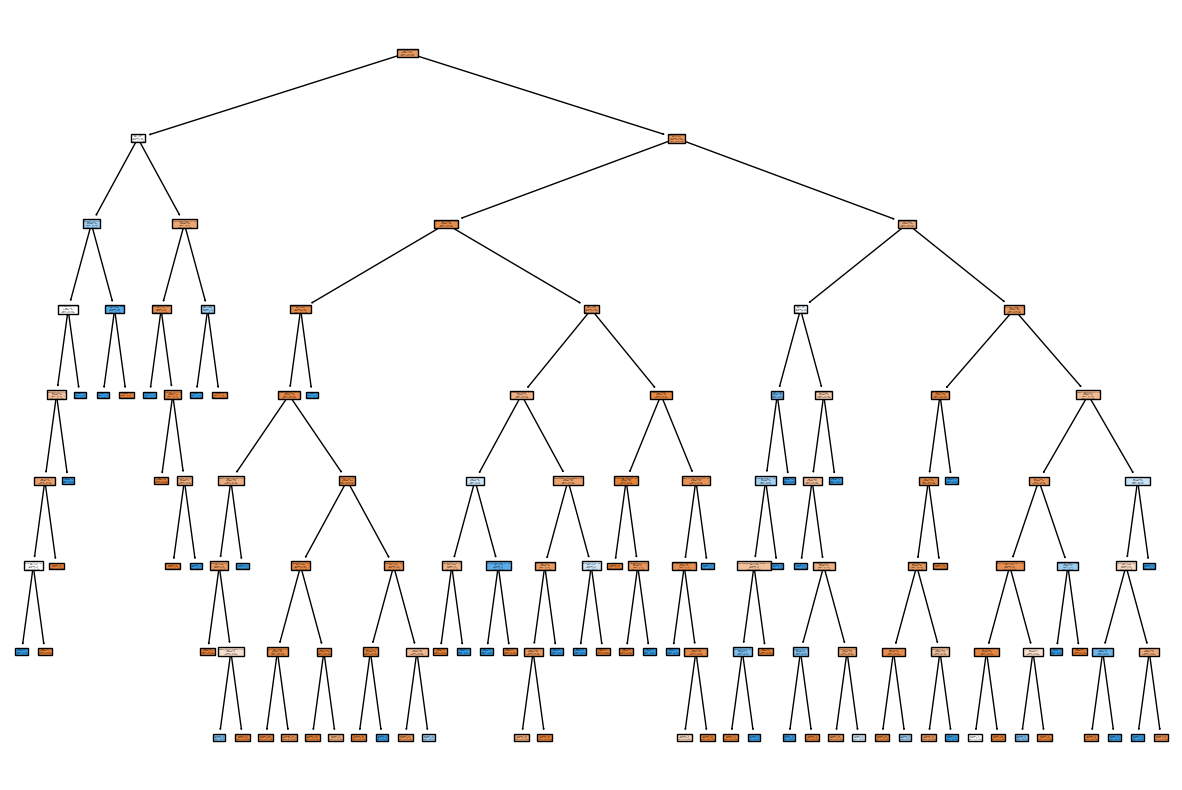

In [ ]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [ ]:
# Hyperparameter Tuning with Grid Search
param_grid = {'criterion':['gini','entropy']}

In [ ]:
grid_search = GridSearchCV(estimator = pruned_cart, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=8, random_state=2407),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='recall')

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy'}
Best Accuracy Score: 0.40257352941176466


In [ ]:
# Train the decision tree on the optimal parameters
optimised_cart = DecisionTreeClassifier(random_state = seed, max_depth = 8, criterion='entropy')
optimised_cart.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2407)

In [ ]:
# Predictions
y_train_pred = optimised_cart.predict(X_train)
y_validation_pred = optimised_cart.predict(X_validation)
y_test_pred = optimised_cart.predict(X_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.942668    0.959016  0.944606     0.950842      0.945353
recall       0.994186    0.692308  0.944606     0.843247      0.944606
f1-score     0.967742    0.804124  0.944606     0.885933      0.940870
support    860.000000  169.000000  0.944606  1029.000000   1029.000000


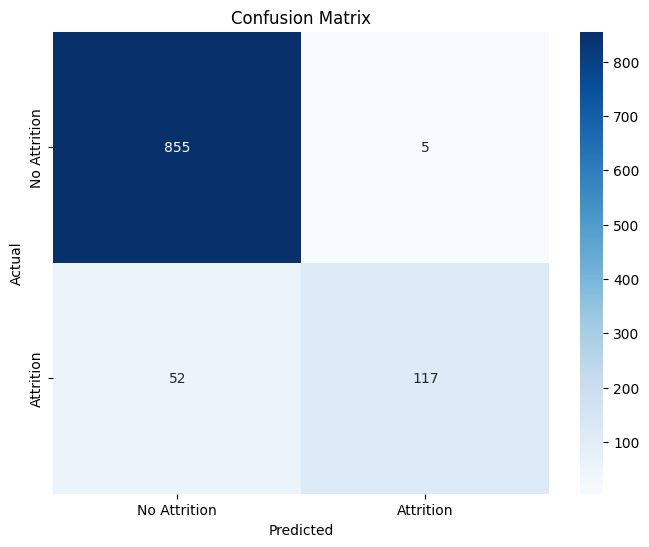

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.871921   0.294118  0.827273    0.583019      0.790503
recall       0.936508   0.161290  0.827273    0.548899      0.827273
f1-score     0.903061   0.208333  0.827273    0.555697      0.805168
support    189.000000  31.000000  0.827273  220.000000    220.000000


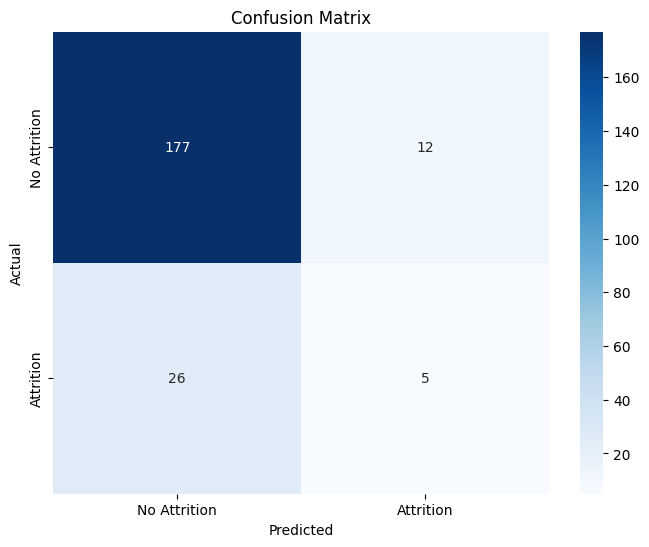

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.869110   0.400000   0.80543    0.634555      0.790571
recall       0.902174   0.324324   0.80543    0.613249      0.805430
f1-score     0.885333   0.358209   0.80543    0.621771      0.797082
support    184.000000  37.000000   0.80543  221.000000    221.000000


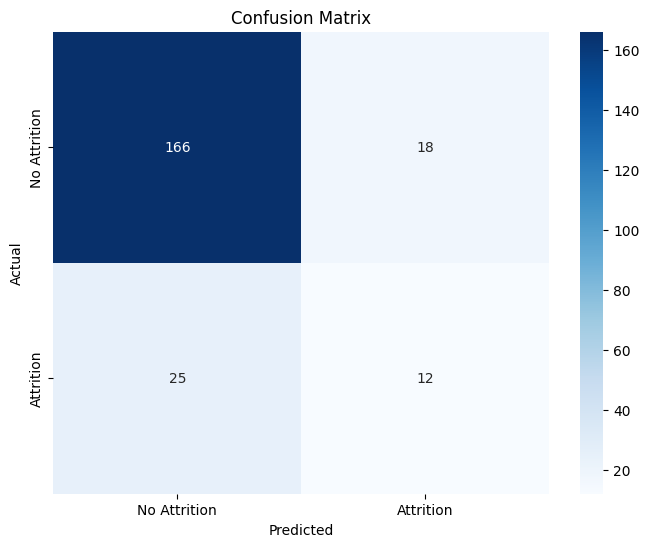

In [ ]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

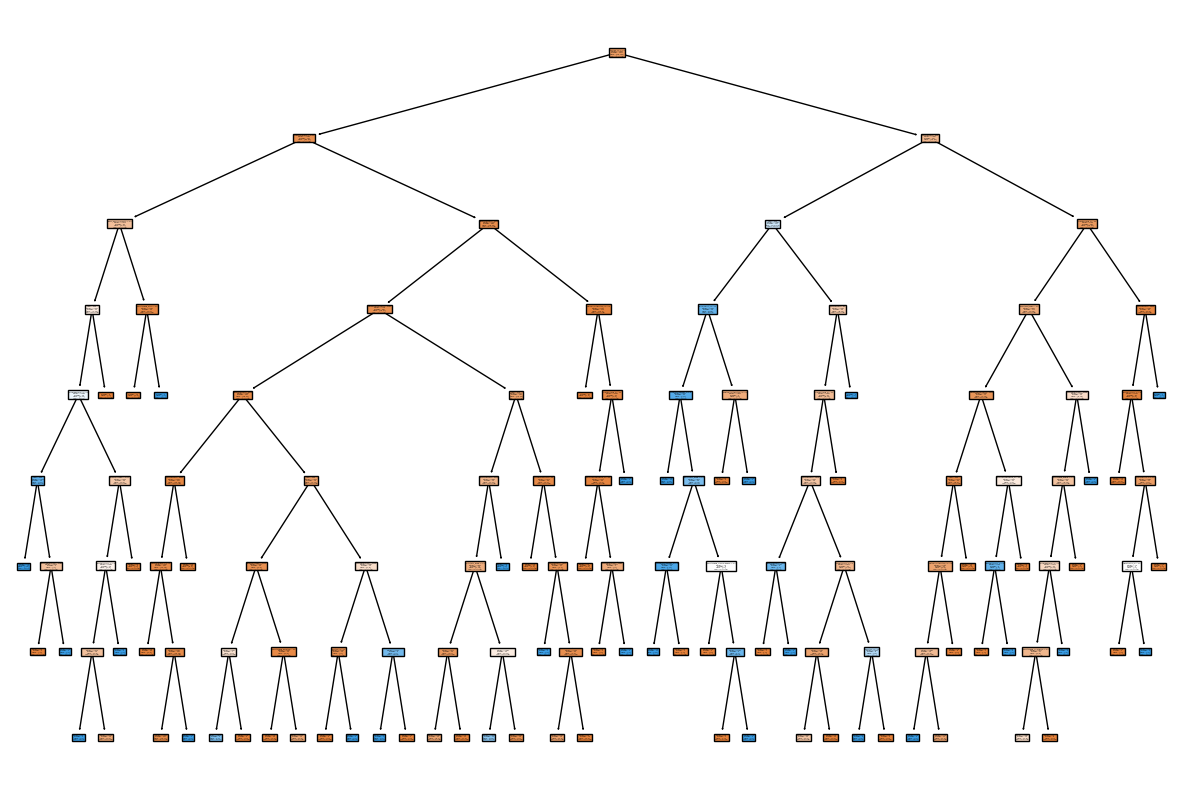

In [ ]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(optimised_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [ ]:
y_pred_cart = optimised_cart.predict_proba(X_test)[:,1].ravel()

# Calculate the ROC curve
fpr_cart, tpr_cart, thresholds_keras = roc_curve(y_test, y_pred_cart)
auc_cart = auc(fpr_cart, tpr_cart)

# Calculate the Precision-Recall curve
precision_cart, recall_cart, _ = precision_recall_curve(y_test, y_pred_cart)
pr_auc_cart = average_precision_score(y_test, y_pred_cart)

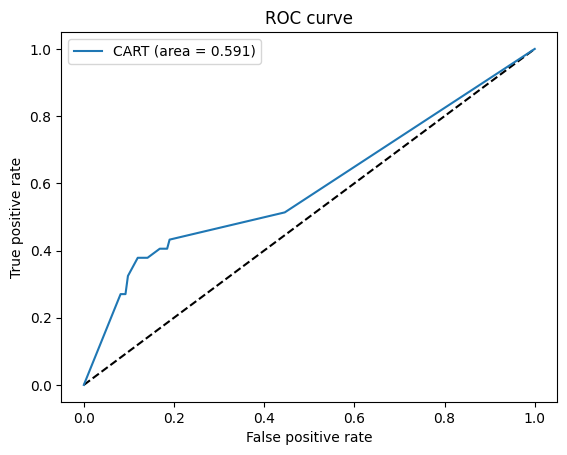

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cart, tpr_cart, label='CART (area = {:.3f})'.format(auc_cart))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

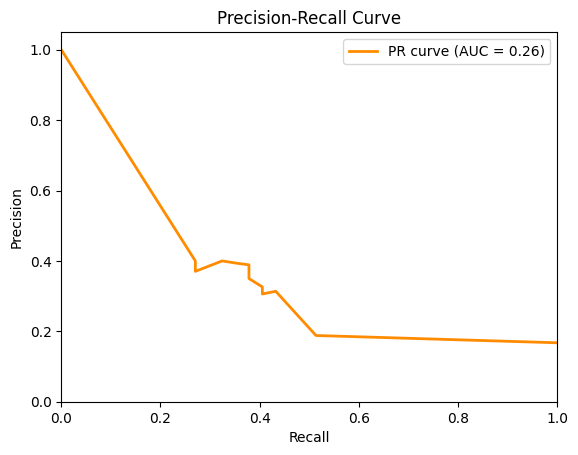

In [ ]:
# Plot the Precision-Recall curve
plt.plot(recall_cart, precision_cart, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_cart)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

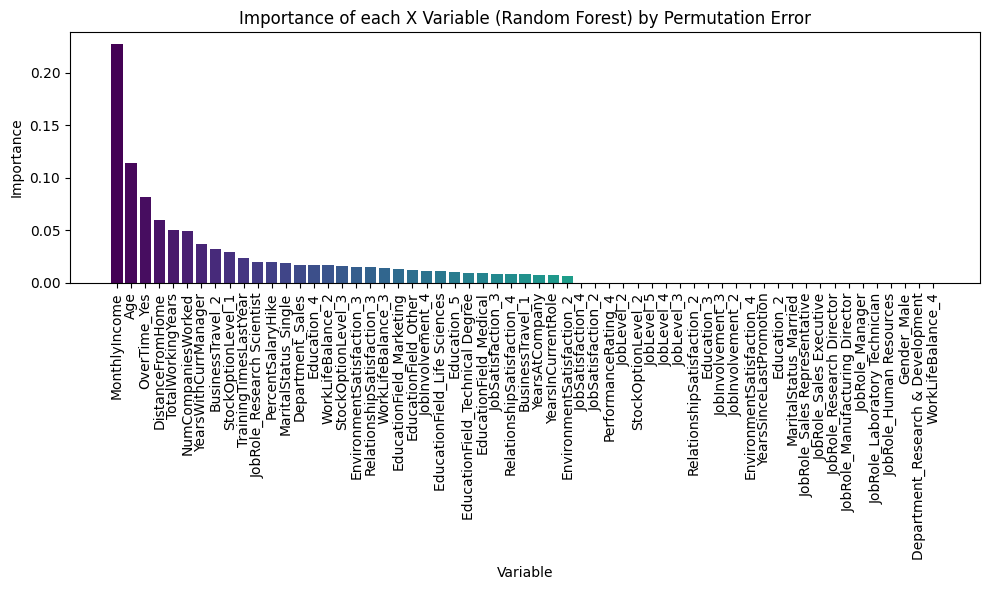

In [ ]:
# Variable Importance
var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': optimised_cart.feature_importances_
})

# Sort the DataFrame by importance in descending order
var_importance_sorted = var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(var_importance_sorted['Variable'], var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (Decision Tree) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Decision trees are prone to overfitting as they grow to a large depth and capture noise or outliers in the training data.

Decision trees are also sensitive to small variations in the training data, leading to high variance in the model's predictions.

This makes them unable to generalise well to unseen data, particularly when they are overly complex or have not been pruned properly. Small changes in the training data can result in different decision trees, making the model unstable.

As such, an ensemble learning method that addresses the disadvantages of decision trees by aggregating multiple trees is used.

<h1>Random Forest</h1>

Random Forest is an ensemble learning technique that builds multiple decision trees during training and combines their predictions to improve the overall accuracy and robustness of the model. For classification, the final prediction of the Random Forest model is determined by a majority vote among the individual trees.

Random Forest employs a technique called bagging (Bootstrap Aggregating), which involves sampling instances with replacement from the training data to create multiple datasets. Each decision tree is trained independently on a bootstrap sample of the training data and a random subset of the features. This introduces diversity among the trees and helps prevent overfitting and improves generalisation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, auc

In [ ]:
# Train a basic random forest model
rf = RandomForestClassifier(n_estimators = 500, random_state=seed, max_features = "sqrt", oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=2407)

======== OOB RESULTS ========
OOB score: 0.8532555879494655
OOB error: 0.14674441205053446


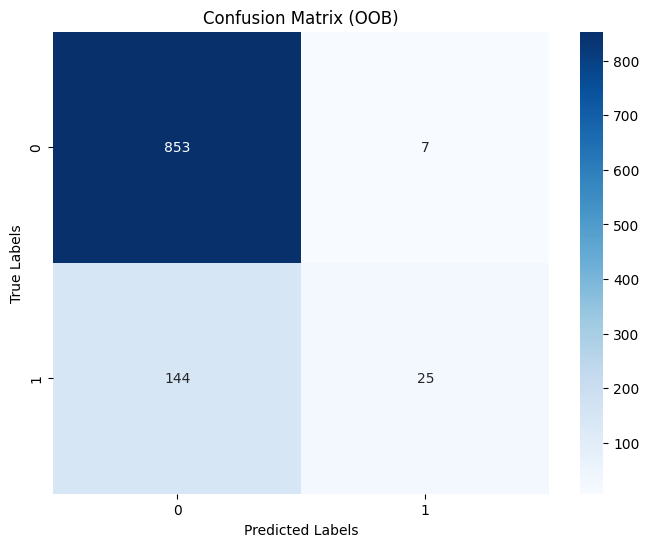

In [ ]:
print("======== OOB RESULTS ========")
print("OOB score:", rf.oob_score_)
print("OOB error:", 1 - rf.oob_score_)

# Predictions
y_train_pred = rf.predict(X_train)
y_validation_pred = rf.predict(X_validation)
y_test_pred = rf.predict(X_test)

# Get the predictions on out-of-bag samples
oob_predictions = rf.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


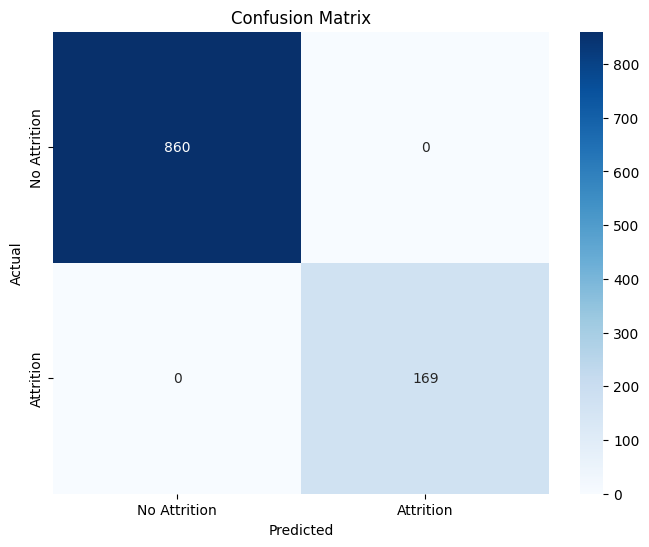

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.875000   1.000000  0.877273    0.937500      0.892614
recall       1.000000   0.129032  0.877273    0.564516      0.877273
f1-score     0.933333   0.228571  0.877273    0.580952      0.834026
support    189.000000  31.000000  0.877273  220.000000    220.000000


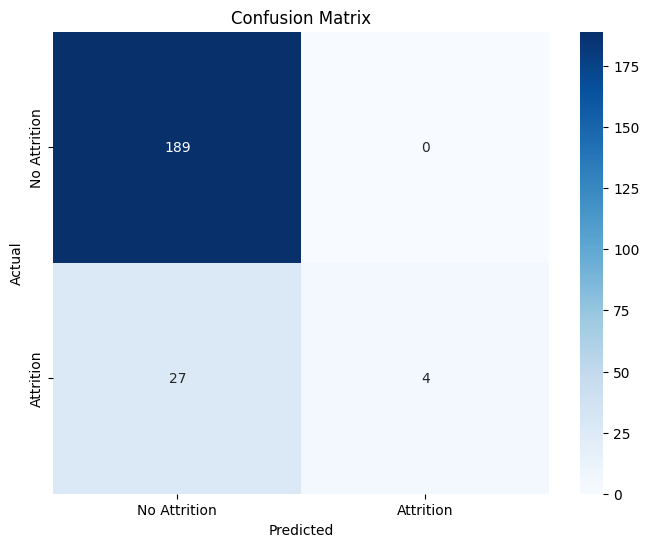

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model predicts perfectly on the train set, but has a low recall (0.13). This suggests that the model is overfitted to the train data. Overfitting can be avoided by varying the random subset feature.

SMOTE

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 500
error_rate = []

for i in range(min_estimators, max_estimators + 1, 5):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

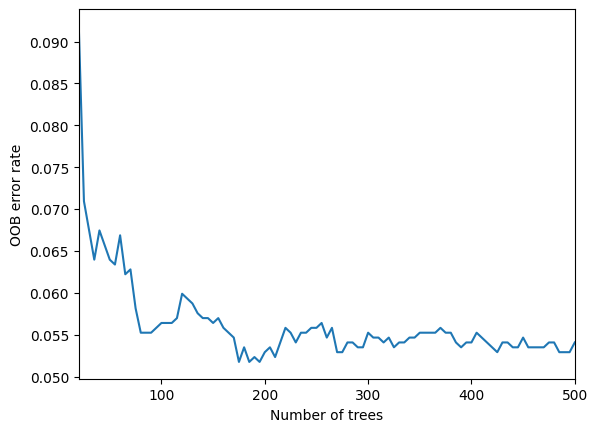

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.show()

The OOB error rate has not stabilised. As such, more trees are needed.

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

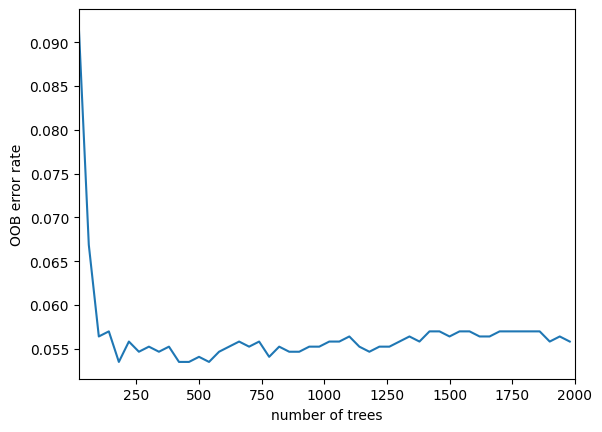

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [ ]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [ ]:
# OOB error stabilises at 1500 trees
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1500)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1500,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.5, 'min_samples_leaf': 2}
Best Accuracy Score: 0.9058139534883722


In [ ]:
# Train random forest model
rf_smote = grid_search.best_estimator_
rf_smote.set_params(oob_score=True)
rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=2, n_estimators=1500,
                       oob_score=True, random_state=2407)

In [ ]:
# Predictions
y_train_pred = rf_smote.predict(X_smote_train)
y_validation_pred = rf_smote.predict(X_scaled_validation)
y_test_pred = rf_smote.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9337209302325581
OOB error: 0.06627906976744191


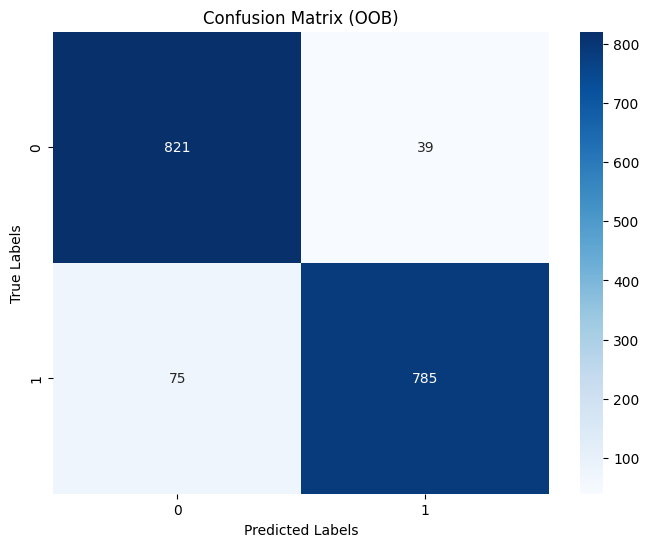

In [ ]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_smote.oob_score_)
print("OOB error:", 1 - rf_smote.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_smote.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_smote_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.997677    0.998836  0.998256     0.998256      0.998256
recall       0.998837    0.997674  0.998256     0.998256      0.998256
f1-score     0.998257    0.998255  0.998256     0.998256      0.998256
support    860.000000  860.000000  0.998256  1720.000000   1720.000000


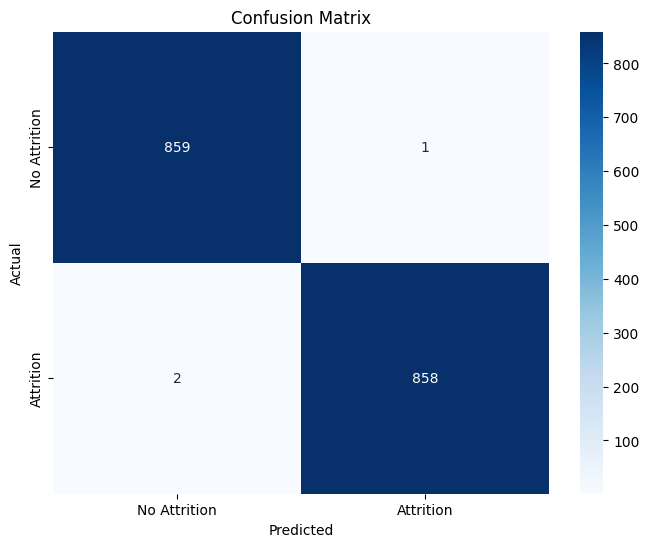

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.896552   0.588235  0.872727    0.742394      0.853107
recall       0.962963   0.322581  0.872727    0.642772      0.872727
f1-score     0.928571   0.416667  0.872727    0.672619      0.856439
support    189.000000  31.000000  0.872727  220.000000    220.000000


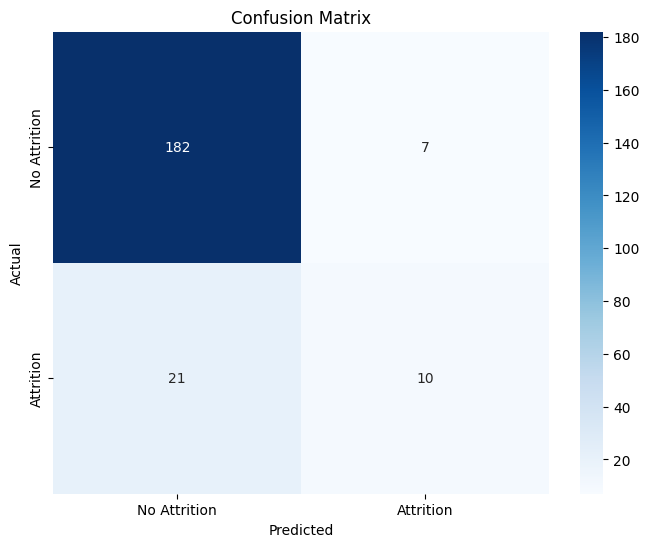

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.880597   0.650000  0.859729    0.765299      0.841990
recall       0.961957   0.351351  0.859729    0.656654      0.859729
f1-score     0.919481   0.456140  0.859729    0.687810      0.841908
support    184.000000  37.000000  0.859729  221.000000    221.000000


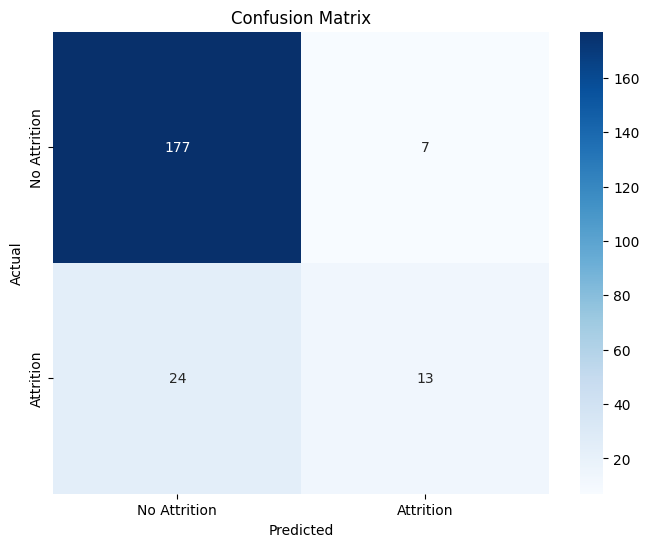

In [ ]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_adasyn_train, y_adasyn_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

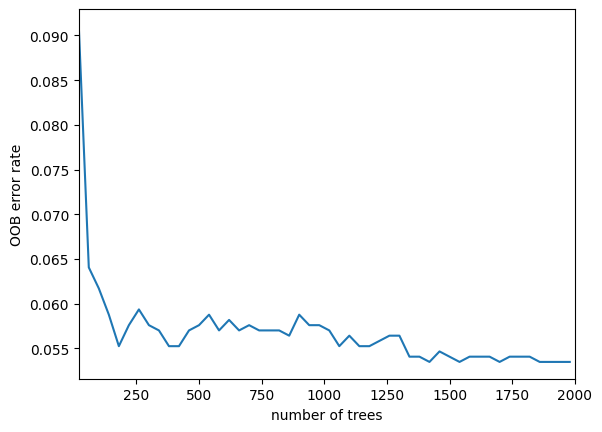

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [ ]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [ ]:
# OOB error stabilises at 1500 trees
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1500)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1500,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [ ]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best recall Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.5, 'min_samples_leaf': 2}
Best recall Score: 0.9022689075630252


In [ ]:
# Train random forest model
rf_adasyn = grid_search.best_estimator_
rf_adasyn.set_params(oob_score=True)
rf_adasyn.fit(X_adasyn_train, y_adasyn_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=2, n_estimators=1500,
                       oob_score=True, random_state=2407)

In [ ]:
# Predictions
y_train_pred = rf_adasyn.predict(X_adasyn_train)
y_validation_pred = rf_adasyn.predict(X_scaled_validation)
y_test_pred = rf_adasyn.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9324324324324325
OOB error: 0.06756756756756754


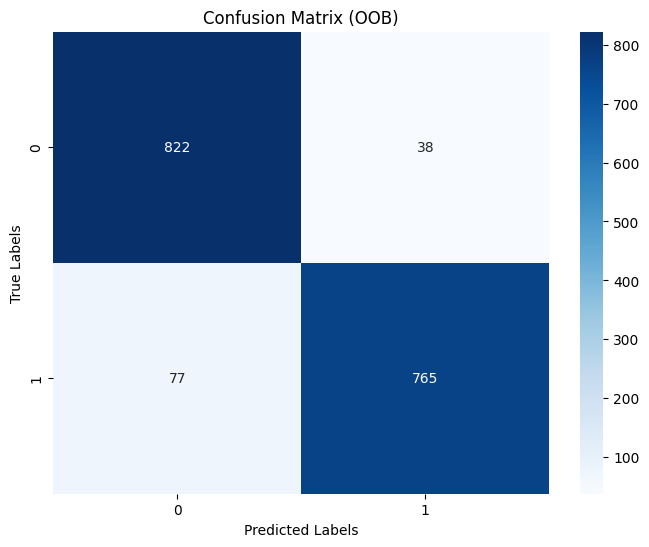

In [ ]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_adasyn.oob_score_)
print("OOB error:", 1 - rf_adasyn.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_adasyn.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_adasyn_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.993072    1.000000  0.996475     0.996536      0.996499
recall       1.000000    0.992874  0.996475     0.996437      0.996475
f1-score     0.996524    0.996424  0.996475     0.996474      0.996475
support    860.000000  842.000000  0.996475  1702.000000   1702.000000


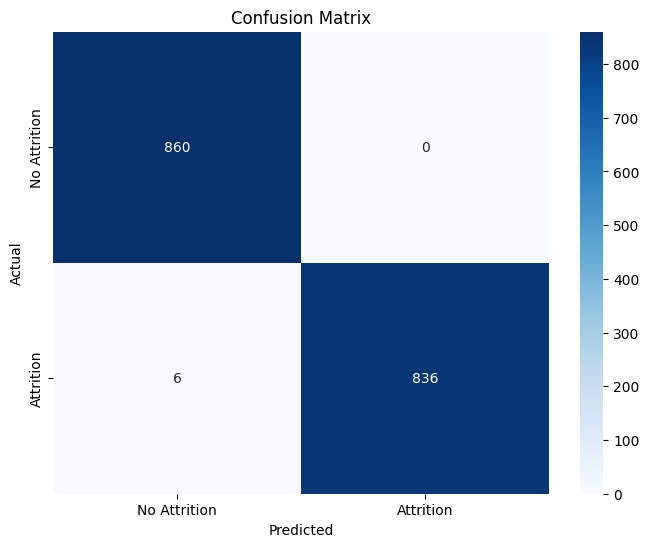

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_adasyn_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.901478   0.647059  0.881818    0.774268      0.865628
recall       0.968254   0.354839  0.881818    0.661546      0.881818
f1-score     0.933673   0.458333  0.881818    0.696003      0.866694
support    189.000000  31.000000  0.881818  220.000000    220.000000


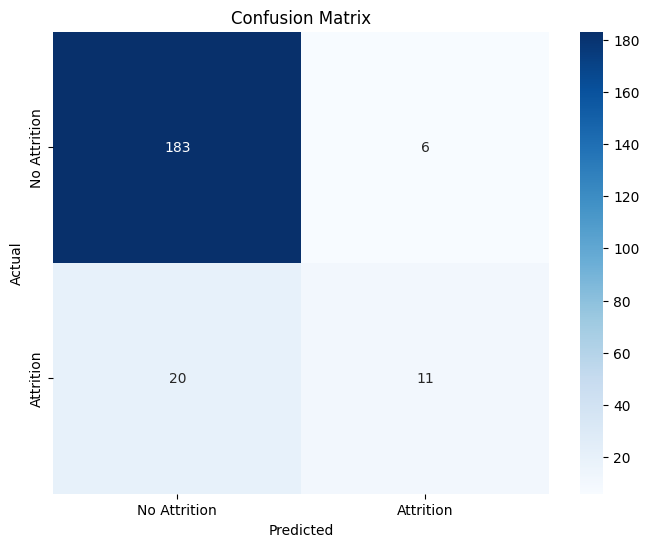

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.880597   0.650000  0.859729    0.765299      0.841990
recall       0.961957   0.351351  0.859729    0.656654      0.859729
f1-score     0.919481   0.456140  0.859729    0.687810      0.841908
support    184.000000  37.000000  0.859729  221.000000    221.000000


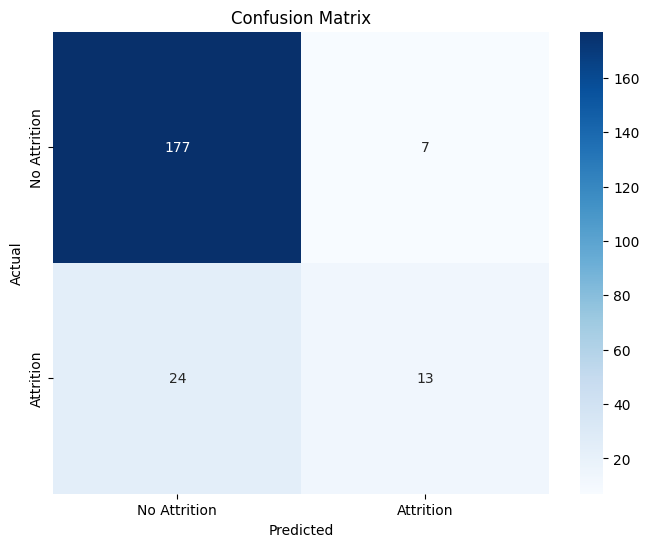

In [ ]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_rf = rf_adasyn.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_keras = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the Precision-Recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = average_precision_score(y_test, y_pred_rf)

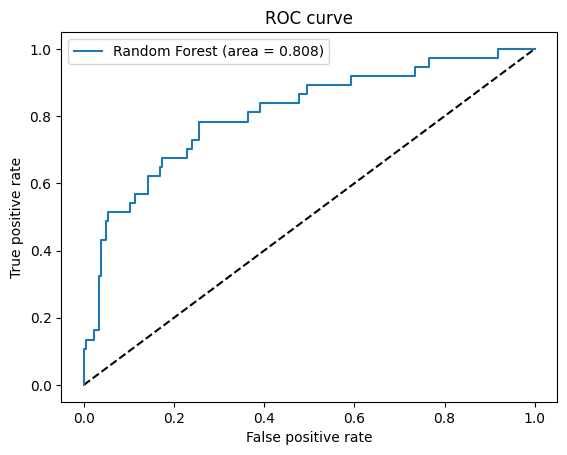

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

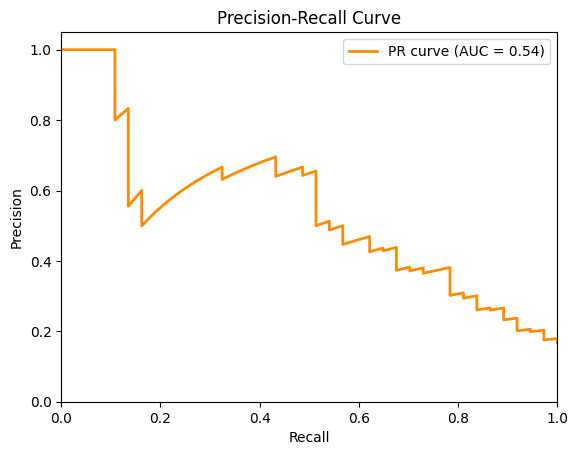

In [ ]:
# Plot the Precision-Recall curve
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

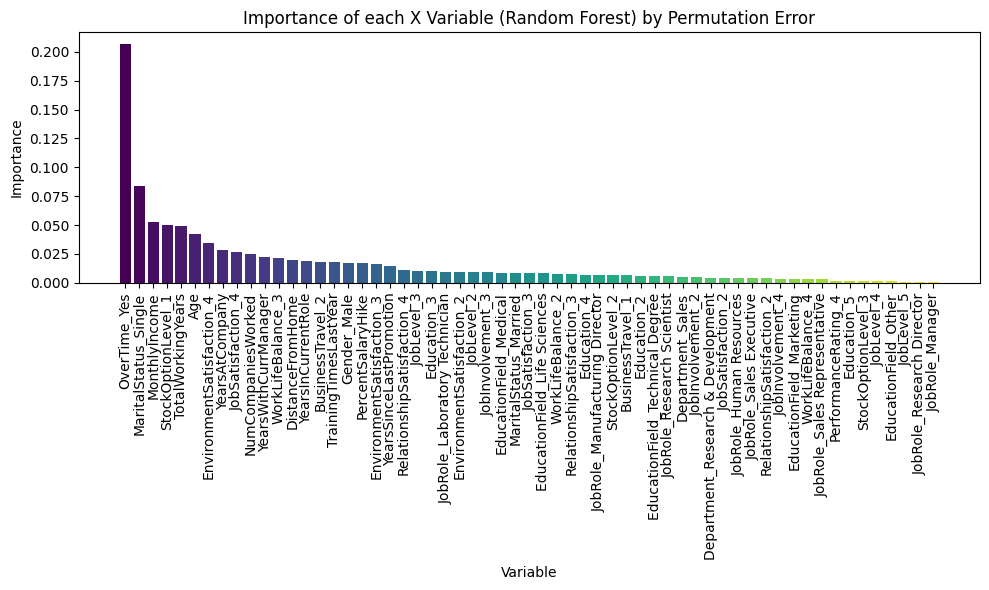

In [ ]:
# Variable Importance
rf_var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': rf_adasyn.feature_importances_
})

# Sort the DataFrame by importance in descending order
rf_var_importance_sorted = rf_var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(rf_var_importance_sorted['Variable'], rf_var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (Random Forest) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h1>XGBoost</h1>

XGBoost is a machine learning algorithm based on the gradient boosting framework, which sequentially trains an ensemble of weak learners (such as decision trees) and combines their predictions to improve overall model performance.

XGBoost incorporates L1 and L2 regularisation terms into the objective function to prevent overfitting and improve generalisation. XGBoost also uses tree pruning to control model complexity and prevent overfitting. It prunes trees during the learning process based on user-defined criteria such as maximum depth, minimum child weight, and minimum gain.

Most importantly, XGBoost measures the contribution of each feature to model predictions, which helps us understand the relative importance of different features in the dataset to derive business insights.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# A parameter grid for optimisation
params = {
        'n_estimators' : [25, 50, 100, 200, 500],
        'learning_rate' : [0.001, 0.01, 0.02, 0.05],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 10, 12, 14, 16]
        }

In [ ]:
# Create XGBoost model
xgb_cfl = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [ ]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best accuracy: 0.8802325581395349


In [ ]:
xgb_smote = random_search.best_estimator_
xgb_smote.fit(X_smote_train, y_smote_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [ ]:
y_train_pred = xgb_smote.predict(X_smote_train)
y_validation_pred = xgb_smote.predict(X_scaled_validation)
y_test_pred = xgb_smote.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False       True  accuracy    macro avg  weighted avg
precision    0.971655    0.99642  0.983721     0.984038      0.984038
recall       0.996512    0.97093  0.983721     0.983721      0.983721
f1-score     0.983927    0.98351  0.983721     0.983718      0.983718
support    860.000000  860.00000  0.983721  1720.000000   1720.000000


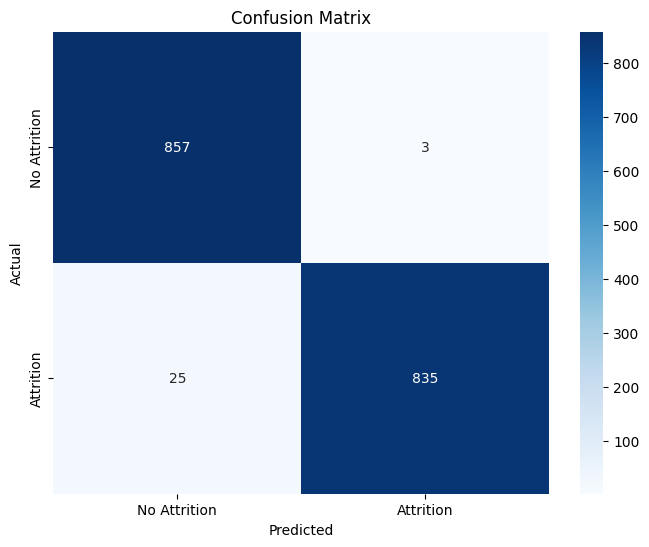

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.891089   0.500000  0.859091    0.695545      0.835981
recall       0.952381   0.290323  0.859091    0.621352      0.859091
f1-score     0.920716   0.367347  0.859091    0.644032      0.842741
support    189.000000  31.000000  0.859091  220.000000    220.000000


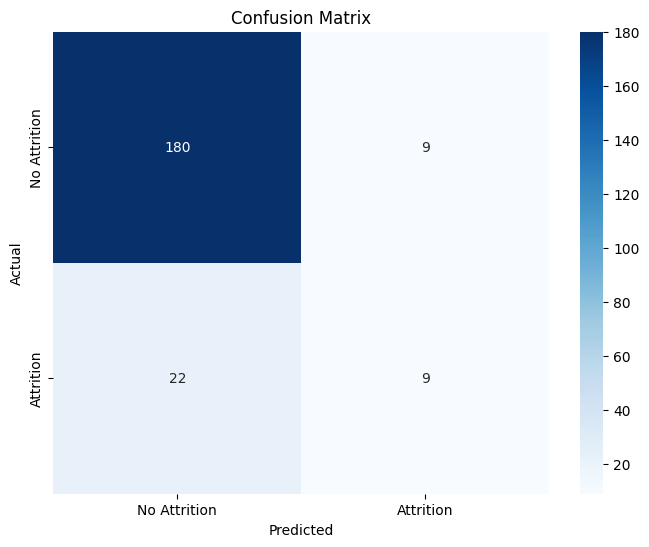

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.884422   0.636364  0.859729    0.760393      0.842892
recall       0.956522   0.378378  0.859729    0.667450      0.859729
f1-score     0.919060   0.474576  0.859729    0.696818      0.844644
support    184.000000  37.000000  0.859729  221.000000    221.000000


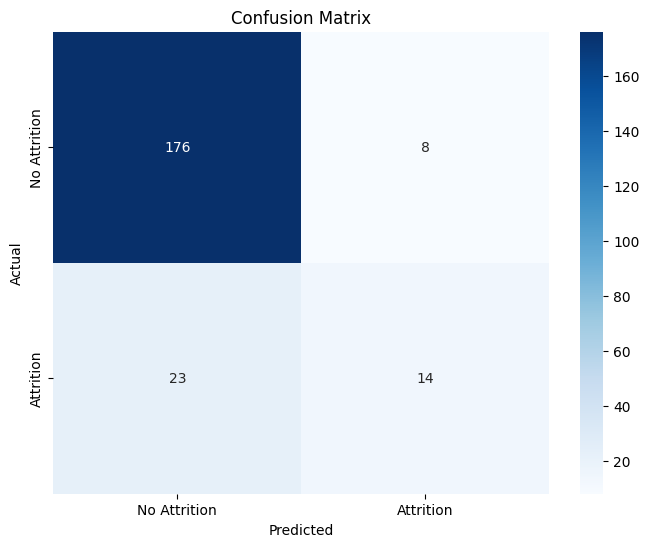

In [ ]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create XGBoost model
xgb_adasyn = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_adasyn, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_adasyn_train, y_adasyn_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [ ]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 16, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best accuracy: 0.879254719639335


In [ ]:
xgb_adasyn = random_search.best_estimator_
xgb_adasyn.fit(X_adasyn_train, y_adasyn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [ ]:
y_train_pred = xgb_adasyn.predict(X_adasyn_train)
y_validation_pred = xgb_adasyn.predict(X_scaled_validation)
y_test_pred = xgb_adasyn.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.964004    0.996310  0.979436     0.980157      0.979986
recall       0.996512    0.961995  0.979436     0.979253      0.979436
f1-score     0.979989    0.978852  0.979436     0.979420      0.979426
support    860.000000  842.000000  0.979436  1702.000000   1702.000000


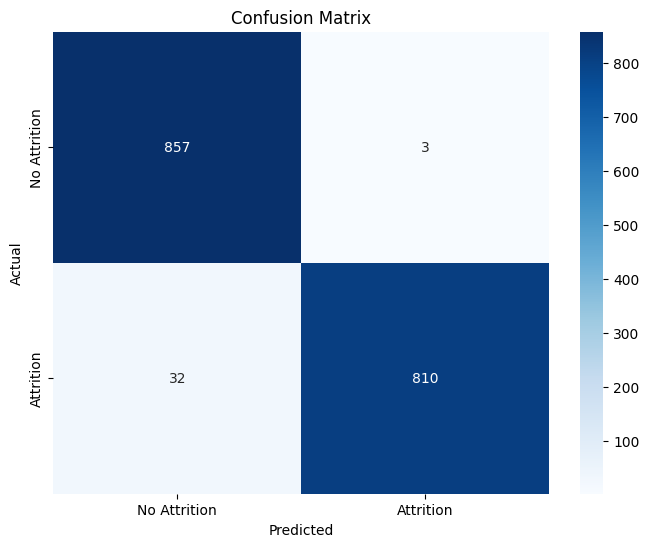

In [ ]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.900000   0.550000  0.868182    0.725000      0.850682
recall       0.952381   0.354839  0.868182    0.653610      0.868182
f1-score     0.925450   0.431373  0.868182    0.678411      0.855830
support    189.000000  31.000000  0.868182  220.000000    220.000000


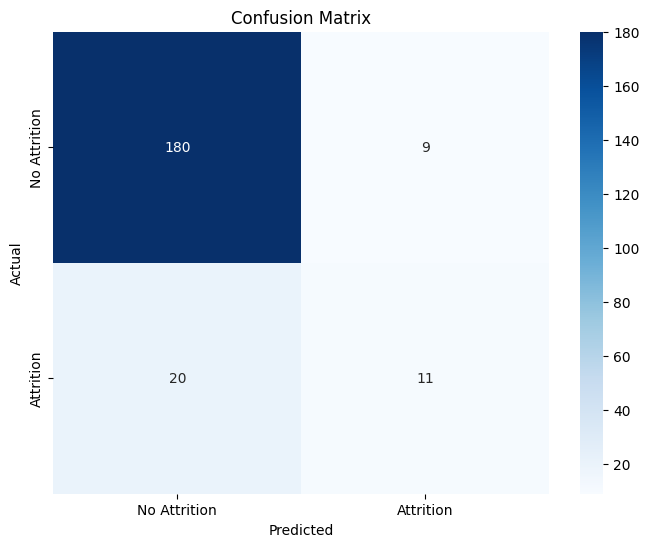

In [ ]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.884422   0.636364  0.859729    0.760393      0.842892
recall       0.956522   0.378378  0.859729    0.667450      0.859729
f1-score     0.919060   0.474576  0.859729    0.696818      0.844644
support    184.000000  37.000000  0.859729  221.000000    221.000000


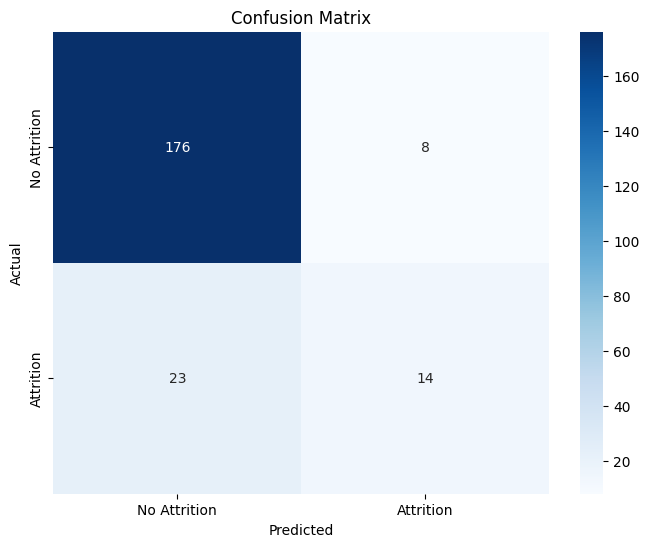

In [ ]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SMOTE is better

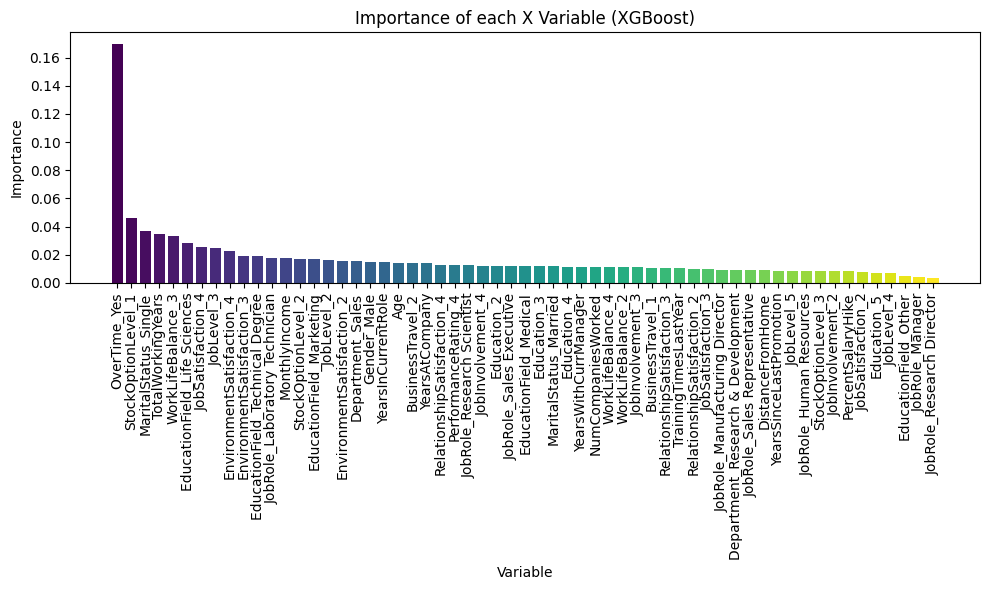

In [ ]:
# Create the variable importance plot
xgb_var_importance = pd.DataFrame({
    'Variable': X_train.columns, 
    'Importance': xgb_smote.feature_importances_
})
xgb_var_importance_sorted = xgb_var_importance.sort_values(by='Importance',ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(X_train.columns)))

plt.figure(figsize = (10,6))
plt.bar(xgb_var_importance_sorted['Variable'], xgb_var_importance_sorted['Importance'], color=colors)
plt.title('Importance of each X Variable (XGBoost)')
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
xgb_var_importance_sorted['Importance']

29    0.169510
53    0.045823
28    0.037178
5     0.034621
57    0.033637
13    0.028621
48    0.025765
43    0.024930
38    0.022695
37    0.019425
17    0.018927
20    0.017656
2     0.017308
54    0.017136
14    0.016922
42    0.016298
36    0.015849
12    0.015751
18    0.014722
8     0.014719
0     0.014410
31    0.014392
7     0.013758
52    0.012588
49    0.012480
24    0.012475
41    0.012324
32    0.012099
25    0.011982
15    0.011942
33    0.011832
27    0.011652
34    0.011541
10    0.011456
3     0.011299
58    0.011275
56    0.011116
40    0.011045
30    0.010903
51    0.010770
6     0.010672
50    0.009795
47    0.009614
22    0.009418
11    0.009239
26    0.009035
1     0.008858
9     0.008669
45    0.008589
19    0.008377
55    0.008361
39    0.008254
4     0.008249
46    0.007828
35    0.006954
44    0.006669
16    0.004914
21    0.004180
23    0.003490
Name: Importance, dtype: float32

In [ ]:
y_pred_xgb = xgb_smote.predict_proba(X_scaled_test)[:,1].ravel()

#  Calculate the ROC curve
fpr_xgb, tpr_xgb, thresholds_keras = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate the Precision-Recall curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
pr_auc_xgb = average_precision_score(y_test, y_pred_xgb)

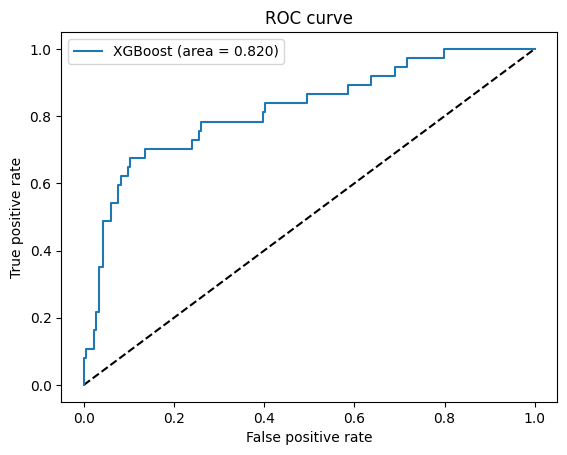

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = {:.3f})'.format(auc_xgb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

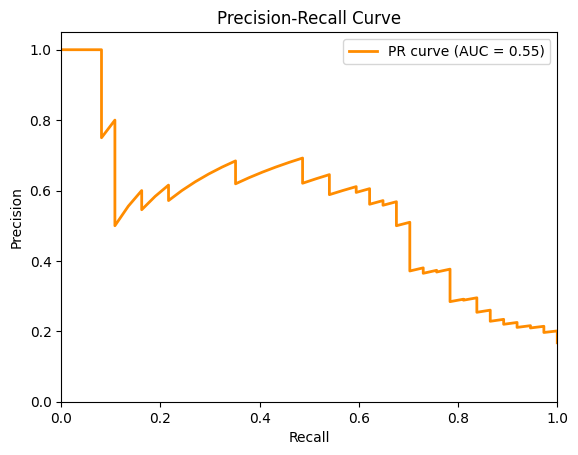

In [ ]:
# Plot the Precision-Recall curve
plt.plot(recall_xgb, precision_xgb, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

<h1>Model Comparison</h1>

The PR curve represents the trade-off between the precision and the false positive rate recall for different classification thresholds.
Recall measures the proportion of actual positive cases that are correctly identified by the model while precision measures the proportion of predicted positive cases that are correctly classified as positive over all actual cases.

The closer the PR curve is to the top-right corner, the better the classifier's performance in distinguishing between positive and negative cases. A higher area under curve (AUC) indicates better discrimination ability, with a maximum value of 1 for a perfect classifier.

Considering the tradeoff between Recall and Precision, increasing Recall even at the expense of decreasing Precision is preferred as the cost of attrition is generally higher than preventive measures to reduce attrition. However, too many incorrect predictions is also undesirable as it would lead to excessive losses.

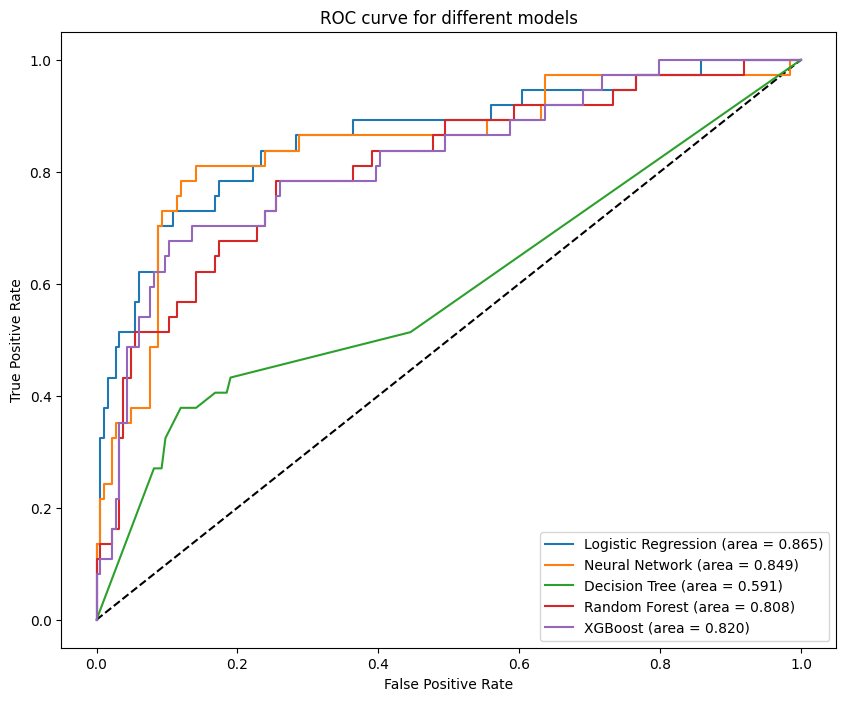

In [ ]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
auc_values = [auc_log, auc_nn, auc_cart, auc_rf, auc_xgb]
fpr_values = [fpr_log, fpr_nn, fpr_cart, fpr_rf, fpr_xgb]
tpr_values = [tpr_log, tpr_nn, tpr_cart, tpr_rf, tpr_xgb]

# Plotting the ROC curves for each classifier
plt.figure(figsize=(10, 8))

# Plot the diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--')

# Plot ROC curve for each classifier
for classifier, fpr, tpr, auc_value in zip(classifiers, fpr_values, tpr_values, auc_values):
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(classifier, auc_value))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for different models')
plt.legend(loc='lower right')
plt.show()

PR-Curve

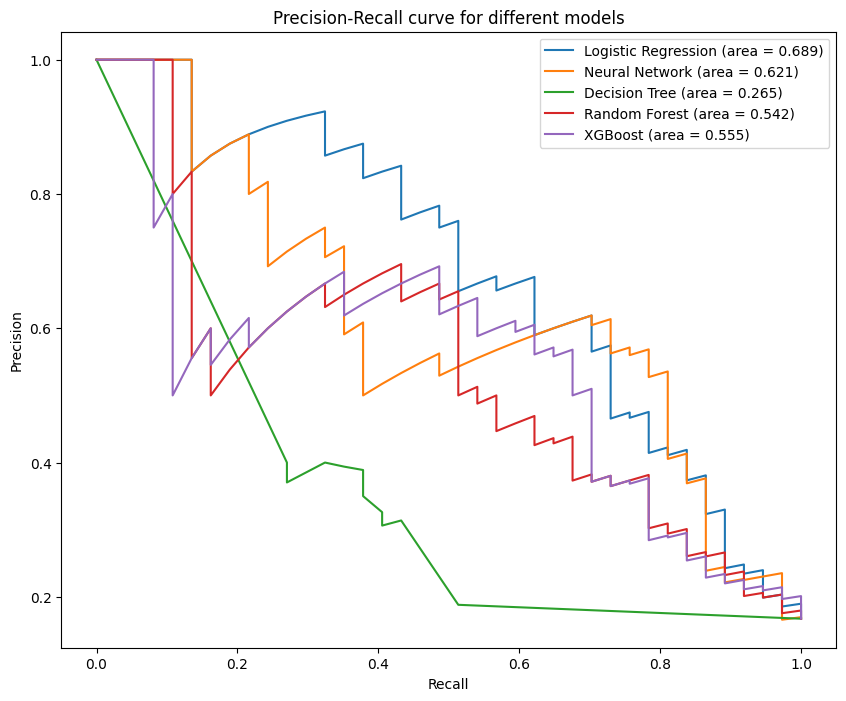

In [ ]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
pr_auc_values = [pr_auc_log, pr_auc_nn, pr_auc_cart, pr_auc_rf, pr_auc_xgb]
recall_values = [recall_log, recall_nn, recall_cart, recall_rf, recall_xgb]
precision_values = [precision_log, precision_nn, precision_cart, precision_rf, precision_xgb]

# Plotting the PR curves for each classifier
plt.figure(figsize=(10, 8))

for classifier, recall, precision, pr_auc_value in zip(classifiers, recall_values, precision_values, pr_auc_values):
    plt.plot(recall, precision, label='{} (area = {:.3f})'.format(classifier, pr_auc_value))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for different models')
plt.legend(loc='best')
plt.show()

From the graph, Neural Network is the best model as it is able to achieve the highest cost savings for a particular Precision-Recall ratio. Although Logistic Regression overtakes Neural Network at multiple points, maximising the recall is preferred and Neural Network is the best model to suit our business needs.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


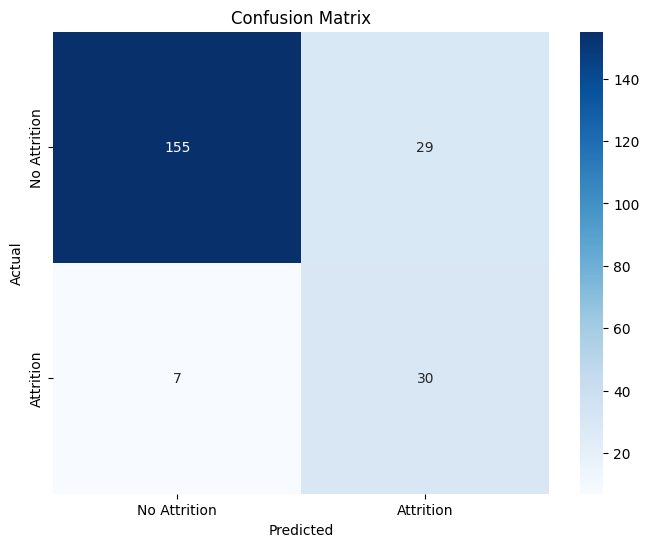

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.956790   0.508475  0.837104    0.732632      0.881733
recall       0.842391   0.810811  0.837104    0.826601      0.837104
f1-score     0.895954   0.625000  0.837104    0.760477      0.850590
support    184.000000  37.000000  0.837104  221.000000    221.000000


In [ ]:
# Adjust the classification threshold
predicted_classes = model3_nn.predict(X_scaled_test)
prediction_classes = [1 if prob > 0.395 else 0 for prob in np.ravel(predicted_classes)]

# Convert probabilities to classes
y_pred = tf.round(prediction_classes)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

Thus, the final model (Neural Network) with the best parameters is received, maximising cost-savings for Tesla